In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import linear_model, preprocessing
from sklearn.ensemble import BaggingClassifier
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#Preprocessing and data wrangling
data = pd.read_csv("/Users/kaylalam/Desktop/Documents/Tufts documents/SPRING 24/HIA 218/Assignment 2/Assignment 2- diabetes data.csv")

In [3]:
data.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

In [4]:
data.shape

(520, 17)

In [5]:
print(data.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [6]:
filtered_df = data[(data['Age'] < 20) | (data['Age'] > 65)]
print(filtered_df)
#dataset contains observations under 20 years old and above 65!

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
7     66    Male      Yes        Yes                Yes      Yes         No   
8     67    Male      Yes        Yes                 No      Yes        Yes   
9     70    Male       No        Yes                Yes      Yes        Yes   
17    67    Male       No        Yes                 No      Yes        Yes   
18    66    Male      Yes        Yes                 No      Yes        Yes   
56    66  Female      Yes        Yes                Yes      Yes        Yes   
88    68  Female      Yes        Yes                 No      Yes        Yes   
101   85    Male      Yes        Yes                Yes      Yes        Yes   
102   90  Female       No        Yes                Yes       No         No   
103   72    Male      Yes         No                Yes      Yes        Yes   
104   70    Male      Yes         No                Yes      Yes        Yes   
105   69  Female      Yes         No                

In [7]:
#drop observations <20 and >65
data_agesubset =data[(data.Age>=20) & (data.Age<=65)]

In [8]:
filtered_df_1 = data_agesubset[(data_agesubset['Age'] < 20) | (data_agesubset['Age'] > 65)]
print(filtered_df_1)

Empty DataFrame
Columns: [Age, Gender, Polyuria, Polydipsia, sudden weight loss, weakness, Polyphagia, Genital thrush, visual blurring, Itching, Irritability, delayed healing, partial paresis, muscle stiffness, Alopecia, Obesity, class]
Index: []


In [9]:
#Normalize and standardize the data. 
data_agesubset.info()
#decision tree does not work with object data
#need to encode and convert this to categorical

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 468 non-null    int64 
 1   Gender              468 non-null    object
 2   Polyuria            468 non-null    object
 3   Polydipsia          468 non-null    object
 4   sudden weight loss  468 non-null    object
 5   weakness            468 non-null    object
 6   Polyphagia          468 non-null    object
 7   Genital thrush      468 non-null    object
 8   visual blurring     468 non-null    object
 9   Itching             468 non-null    object
 10  Irritability        468 non-null    object
 11  delayed healing     468 non-null    object
 12  partial paresis     468 non-null    object
 13  muscle stiffness    468 non-null    object
 14  Alopecia            468 non-null    object
 15  Obesity             468 non-null    object
 16  class               468 non-nul

In [10]:
le= LabelEncoder()

In [11]:
data_agesubset["Gender"].value_counts()

Gender
Male      291
Female    177
Name: count, dtype: int64

In [12]:
data_agesubset["Gender"] = le.fit_transform(data_agesubset["Gender"])
data_agesubset["Gender"] = data_agesubset["Gender"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/634143615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Gender"] = le.fit_transform(data_agesubset["Gender"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/634143615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Gender"] = data_agesubset["Gender"].astype("category")


In [13]:
data_agesubset["Gender"].value_counts()
#0=Female, 1=Male

Gender
1    291
0    177
Name: count, dtype: int64

In [14]:
data_agesubset["Polyuria"].value_counts() 

Polyuria
No     248
Yes    220
Name: count, dtype: int64

In [15]:
data_agesubset["Polyuria"] = le.fit_transform(data_agesubset["Polyuria"])
data_agesubset["Polyuria"] = data_agesubset["Polyuria"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/3931961270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Polyuria"] = le.fit_transform(data_agesubset["Polyuria"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/3931961270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Polyuria"] = data_agesubset["Polyuria"].astype("category")


In [16]:
data_agesubset["Polyuria"].value_counts() 
#0=No, 1=Yes

Polyuria
0    248
1    220
Name: count, dtype: int64

In [17]:
data_agesubset["Polydipsia"].value_counts() 

Polydipsia
No     261
Yes    207
Name: count, dtype: int64

In [18]:
data_agesubset["Polydipsia"] = le.fit_transform(data_agesubset["Polydipsia"])
data_agesubset["Polydipsia"] = data_agesubset["Polydipsia"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/4163913906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Polydipsia"] = le.fit_transform(data_agesubset["Polydipsia"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/4163913906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Polydipsia"] = data_agesubset["Polydipsia"].astype("category")


In [19]:
data_agesubset["Polydipsia"].value_counts() 
#0=No, 1=Yes

Polydipsia
0    261
1    207
Name: count, dtype: int64

In [20]:
data_agesubset["sudden weight loss"].value_counts() 

sudden weight loss
No     271
Yes    197
Name: count, dtype: int64

In [21]:
data_agesubset["sudden weight loss"] = le.fit_transform(data_agesubset["sudden weight loss"])
data_agesubset["sudden weight loss"] = data_agesubset["sudden weight loss"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/3025992986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["sudden weight loss"] = le.fit_transform(data_agesubset["sudden weight loss"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/3025992986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["sudden weight loss"] = data_agesubset["sudden weight loss"].astype("category")


In [22]:
data_agesubset["sudden weight loss"].value_counts() 
#0=No, 1=Yes

sudden weight loss
0    271
1    197
Name: count, dtype: int64

In [23]:
data_agesubset["weakness"].value_counts() 

weakness
Yes    270
No     198
Name: count, dtype: int64

In [24]:
data_agesubset["weakness"] = le.fit_transform(data_agesubset["weakness"])
data_agesubset["weakness"] = data_agesubset["weakness"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/331285048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["weakness"] = le.fit_transform(data_agesubset["weakness"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/331285048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["weakness"] = data_agesubset["weakness"].astype("category")


In [25]:
data_agesubset["weakness"].value_counts() 
#0=No, 1=Yes

weakness
1    270
0    198
Name: count, dtype: int64

In [26]:
data_agesubset["Polyphagia"].value_counts() 

Polyphagia
No     272
Yes    196
Name: count, dtype: int64

In [27]:
data_agesubset["Polyphagia"] = le.fit_transform(data_agesubset["Polyphagia"])
data_agesubset["Polyphagia"] = data_agesubset["Polyphagia"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/4228676402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Polyphagia"] = le.fit_transform(data_agesubset["Polyphagia"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/4228676402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Polyphagia"] = data_agesubset["Polyphagia"].astype("category")


In [28]:
data_agesubset["Polyphagia"].value_counts() 
#0=No, 1=Yes

Polyphagia
0    272
1    196
Name: count, dtype: int64

In [29]:
data_agesubset["Genital thrush"].value_counts() 

Genital thrush
No     367
Yes    101
Name: count, dtype: int64

In [30]:
data_agesubset["Genital thrush"] = le.fit_transform(data_agesubset["Genital thrush"])
data_agesubset["Genital thrush"] = data_agesubset["Genital thrush"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/545545419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Genital thrush"] = le.fit_transform(data_agesubset["Genital thrush"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/545545419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Genital thrush"] = data_agesubset["Genital thrush"].astype("category")


In [31]:
data_agesubset["Genital thrush"].value_counts() 
#0=No, 1=Yes

Genital thrush
0    367
1    101
Name: count, dtype: int64

In [32]:
data_agesubset["visual blurring"].value_counts() 

visual blurring
No     277
Yes    191
Name: count, dtype: int64

In [33]:
data_agesubset["visual blurring"] = le.fit_transform(data_agesubset["visual blurring"])
data_agesubset["visual blurring"] = data_agesubset["visual blurring"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/2085659783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["visual blurring"] = le.fit_transform(data_agesubset["visual blurring"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/2085659783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["visual blurring"] = data_agesubset["visual blurring"].astype("category")


In [34]:
data_agesubset["visual blurring"].value_counts() 
#0=No, 1=Yes

visual blurring
0    277
1    191
Name: count, dtype: int64

In [35]:
data_agesubset["Itching"].value_counts()

Itching
No     254
Yes    214
Name: count, dtype: int64

In [36]:
data_agesubset["Itching"] = le.fit_transform(data_agesubset["Itching"])
data_agesubset["Itching"] = data_agesubset["Itching"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/1665247007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Itching"] = le.fit_transform(data_agesubset["Itching"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/1665247007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Itching"] = data_agesubset["Itching"].astype("category")


In [37]:
data_agesubset["Itching"].value_counts()
#0=No, 1=Yes

Itching
0    254
1    214
Name: count, dtype: int64

In [38]:
data_agesubset["Irritability"].value_counts()

Irritability
No     364
Yes    104
Name: count, dtype: int64

In [39]:
data_agesubset["Irritability"] = le.fit_transform(data_agesubset["Irritability"])
data_agesubset["Irritability"] = data_agesubset["Irritability"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/525695515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Irritability"] = le.fit_transform(data_agesubset["Irritability"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/525695515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Irritability"] = data_agesubset["Irritability"].astype("category")


In [40]:
data_agesubset["Irritability"].value_counts()
#0=No, 1=Yes

Irritability
0    364
1    104
Name: count, dtype: int64

In [41]:
data_agesubset["delayed healing"].value_counts()

delayed healing
No     264
Yes    204
Name: count, dtype: int64

In [42]:
data_agesubset["delayed healing"] = le.fit_transform(data_agesubset["delayed healing"])
data_agesubset["delayed healing"] = data_agesubset["delayed healing"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/4187461516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["delayed healing"] = le.fit_transform(data_agesubset["delayed healing"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/4187461516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["delayed healing"] = data_agesubset["delayed healing"].astype("category")


In [43]:
data_agesubset["delayed healing"].value_counts()
#0=No, 1=Yes

delayed healing
0    264
1    204
Name: count, dtype: int64

In [44]:
data_agesubset["partial paresis"].value_counts()

partial paresis
No     277
Yes    191
Name: count, dtype: int64

In [45]:
data_agesubset["partial paresis"] = le.fit_transform(data_agesubset["partial paresis"])
data_agesubset["partial paresis"] = data_agesubset["partial paresis"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/3056279371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["partial paresis"] = le.fit_transform(data_agesubset["partial paresis"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/3056279371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["partial paresis"] = data_agesubset["partial paresis"].astype("category")


In [46]:
data_agesubset["partial paresis"].value_counts()
#0=No, 1=Yes

partial paresis
0    277
1    191
Name: count, dtype: int64

In [47]:
data_agesubset["muscle stiffness"].value_counts()

muscle stiffness
No     307
Yes    161
Name: count, dtype: int64

In [48]:
data_agesubset["muscle stiffness"] = le.fit_transform(data_agesubset["muscle stiffness"])
data_agesubset["muscle stiffness"] = data_agesubset["muscle stiffness"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/2300944679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["muscle stiffness"] = le.fit_transform(data_agesubset["muscle stiffness"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/2300944679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["muscle stiffness"] = data_agesubset["muscle stiffness"].astype("category")


In [49]:
data_agesubset["muscle stiffness"].value_counts()
#0=No, 1=Yes

muscle stiffness
0    307
1    161
Name: count, dtype: int64

In [50]:
data_agesubset["Alopecia"].value_counts()

Alopecia
No     319
Yes    149
Name: count, dtype: int64

In [51]:
data_agesubset["Alopecia"] = le.fit_transform(data_agesubset["Alopecia"])
data_agesubset["Alopecia"] = data_agesubset["Alopecia"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/4133402658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Alopecia"] = le.fit_transform(data_agesubset["Alopecia"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/4133402658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Alopecia"] = data_agesubset["Alopecia"].astype("category")


In [52]:
data_agesubset["Alopecia"].value_counts()
#0=No, 1=Yes

Alopecia
0    319
1    149
Name: count, dtype: int64

In [53]:
data_agesubset["Obesity"].value_counts()

Obesity
No     389
Yes     79
Name: count, dtype: int64

In [54]:
data_agesubset["Obesity"] = le.fit_transform(data_agesubset["Obesity"])
data_agesubset["Obesity"] = data_agesubset["Obesity"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/671383995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Obesity"] = le.fit_transform(data_agesubset["Obesity"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/671383995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["Obesity"] = data_agesubset["Obesity"].astype("category")


In [55]:
data_agesubset["Obesity"].value_counts()
#0=No, 1=Yes

Obesity
0    389
1     79
Name: count, dtype: int64

In [56]:
data_agesubset["class"].value_counts()

class
Positive    284
Negative    184
Name: count, dtype: int64

In [57]:
data_agesubset["class"] = le.fit_transform(data_agesubset["class"])
data_agesubset["class"] = data_agesubset["class"].astype("category")

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/3726379654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["class"] = le.fit_transform(data_agesubset["class"])
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/3726379654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset["class"] = data_agesubset["class"].astype("category")


In [58]:
data_agesubset["class"].value_counts()
#0=Negative, 1=Positive

class
1    284
0    184
Name: count, dtype: int64

In [59]:
data_agesubset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 468 non-null    int64   
 1   Gender              468 non-null    category
 2   Polyuria            468 non-null    category
 3   Polydipsia          468 non-null    category
 4   sudden weight loss  468 non-null    category
 5   weakness            468 non-null    category
 6   Polyphagia          468 non-null    category
 7   Genital thrush      468 non-null    category
 8   visual blurring     468 non-null    category
 9   Itching             468 non-null    category
 10  Irritability        468 non-null    category
 11  delayed healing     468 non-null    category
 12  partial paresis     468 non-null    category
 13  muscle stiffness    468 non-null    category
 14  Alopecia            468 non-null    category
 15  Obesity             468 non-null    category


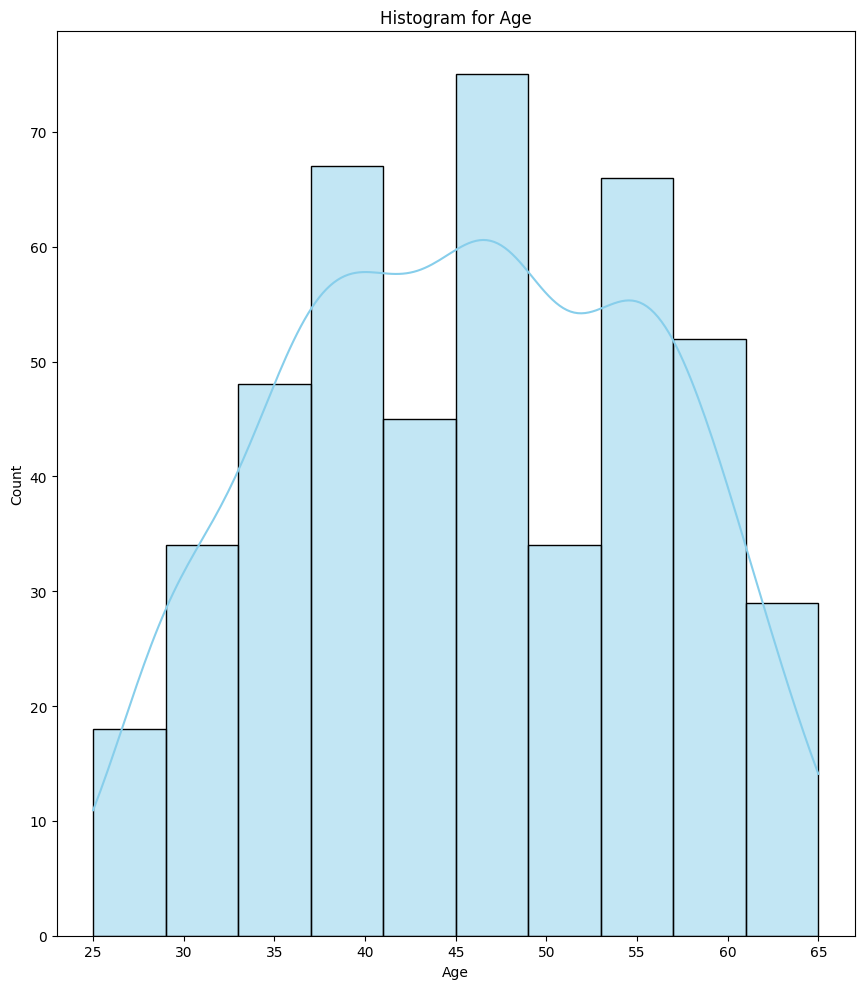

In [60]:
#Normalize and standardize the data.
numeric_columns = data_agesubset.select_dtypes(include=[np.number]).columns.tolist()

num_rows = math.ceil(len(numeric_columns)/3)
plt.figure(figsize=(25,10 * num_rows))

for i, numeric_columns in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data=data_agesubset[numeric_columns], kde=True, color='skyblue')
    plt.title(f"Histogram for {numeric_columns}")
    
plt.tight_layout()
plt.show()

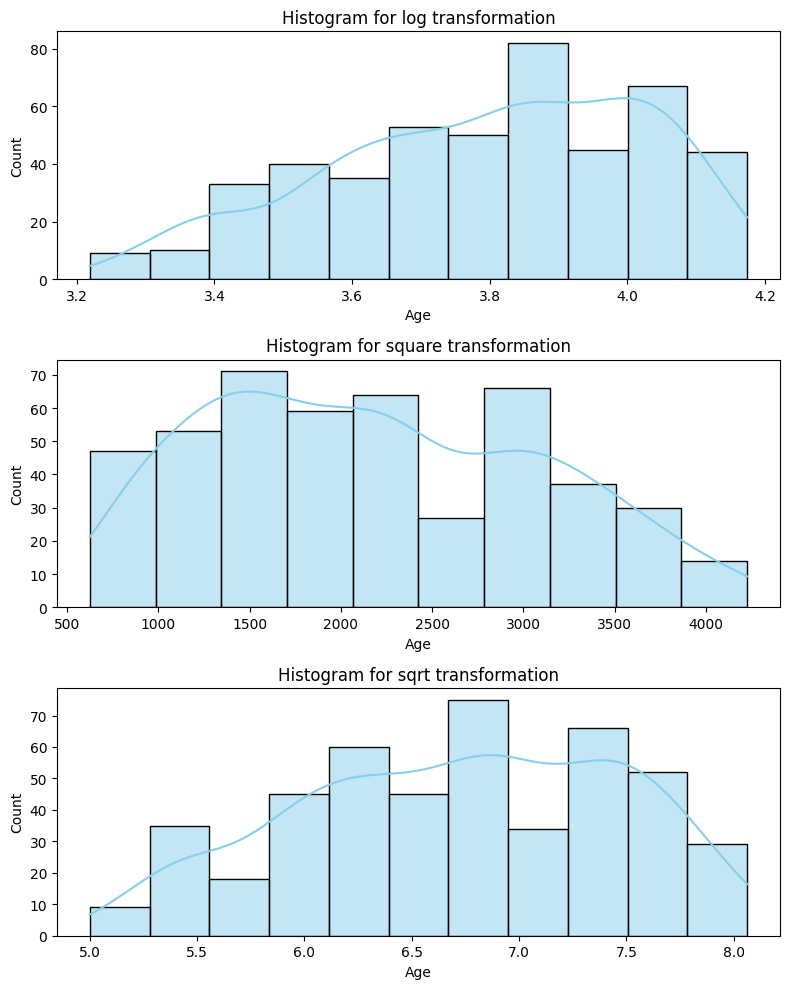

In [61]:
#List of transformations - AGE
transformations = ["log", "square", "sqrt"]

#Dictionary mapping transformation names to corresponding functions
transformation_functions = {
    "log": np.log,
    "square": np.square,
    "sqrt": np.sqrt
}

fig, axs = plt.subplots(3, 1, figsize=(8,10))

for i, transformation in enumerate(transformations):
    sns.histplot(transformation_functions[transformation](data_agesubset["Age"]), kde=True, color='skyblue', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"Histogram for {transformation} transformation")
plt.tight_layout()
plt.show()

In [62]:
#Normalize and standardize the data.
#Square transformation looks best, so lets do that to Age and then standardize
#Square-transformed variable
square_transformed_age = np.square(data_agesubset['Age'])

#standardized scaling
data_reshaped = np.array(square_transformed_age).reshape(-1, 1)
scaler = StandardScaler()
data_agesubset['standardized_squared_age'] = scaler.fit_transform(data_reshaped)
data_agesubset.drop(columns=['Age'], inplace=True)

/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/2294316412.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset['standardized_squared_age'] = scaler.fit_transform(data_reshaped)
/var/folders/zb/vsylfhtn32z6fc641ngyjy1h0000gn/T/ipykernel_26171/2294316412.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_agesubset.drop(columns=['Age'], inplace=True)


In [63]:
data_agesubset.head()

Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0      1        0          1                  0        1          0   
1      1        0          0                  0        1          0   
2      1        1          0                  0        1          1   
3      1        0          0                  1        1          1   
4      1        1          1                  1        1          1   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0              0               0       1            0               1   
1              0               1       0            0               0   
2              0               0       1            0               1   
3              1               0       1            0               1   
4              0               1       1            1               1   

  partial paresis muscle stiffness Alopecia Obesity class  \
0               0                1        1       1     1   
1               1                0        1       0     1   
2               0                1        1       0     1   
3               0                0        0       0     1   
4               1                1        1       1     1   

   standardized_squared_age  
0                 -0.643171  
1                  1.295451  
2                 -0.554153  
3                 -0.176099  
4                  1.554813

In [64]:
missing_values = data_agesubset.isnull().sum()
print(missing_values)
#no missing values!

Gender                      0
Polyuria                    0
Polydipsia                  0
sudden weight loss          0
weakness                    0
Polyphagia                  0
Genital thrush              0
visual blurring             0
Itching                     0
Irritability                0
delayed healing             0
partial paresis             0
muscle stiffness            0
Alopecia                    0
Obesity                     0
class                       0
standardized_squared_age    0
dtype: int64


In [65]:
#Identify the outliers in the data.

Q1 = data_agesubset['standardized_squared_age'].quantile(0.25)
Q3 = data_agesubset['standardized_squared_age'].quantile(0.75)
IQR = Q3 - Q1

#Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

#Identify outliers
outliers = data_agesubset[(data_agesubset['standardized_squared_age'] < lower_bound) | (data_agesubset['standardized_squared_age'] > upper_bound)]

#Print outliers
print(outliers)

Empty DataFrame
Columns: [Gender, Polyuria, Polydipsia, sudden weight loss, weakness, Polyphagia, Genital thrush, visual blurring, Itching, Irritability, delayed healing, partial paresis, muscle stiffness, Alopecia, Obesity, class, standardized_squared_age]
Index: []


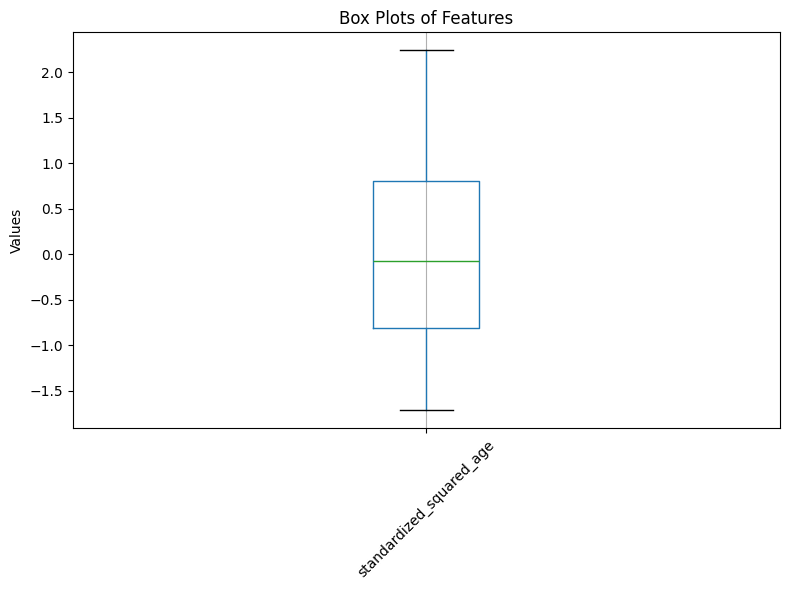

In [66]:
df = pd.DataFrame(data_agesubset["standardized_squared_age"])

plt.figure(figsize=(8, 6))  
df.boxplot()
plt.title('Box Plots of Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.tight_layout()  
plt.show()
#no outliers!

In [67]:
#Splitting the data
#In order to evaluate the ML model performance, split the data into train and validation.
#Take the first 70% of the data as training data and the remaining 30% as test dataset.
y = data_agesubset["class"]
X = data_agesubset.drop(columns=["class"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [68]:
#Build a decision tree
#Vanilla decision tree classifier
DT_classifier = DecisionTreeClassifier()

In [69]:
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_pred = DT_classifier.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred)

0.9716312056737588

[Text(0.6783088235294118, 0.95, 'Polyuria <= 0.5\ngini = 0.479\nsamples = 327\nvalue = [130, 197]\nclass = 1'),
 Text(0.41544117647058826, 0.85, 'Gender <= 0.5\ngini = 0.414\nsamples = 181\nvalue = [128.0, 53.0]\nclass = 0'),
 Text(0.19117647058823528, 0.75, 'Alopecia <= 0.5\ngini = 0.408\nsamples = 42\nvalue = [12, 30]\nclass = 1'),
 Text(0.11764705882352941, 0.65, 'standardized_squared_age <= -1.093\ngini = 0.17\nsamples = 32\nvalue = [3, 29]\nclass = 1'),
 Text(0.058823529411764705, 0.55, 'partial paresis <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.029411764705882353, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.08823529411764706, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.17647058823529413, 0.55, 'Irritability <= 0.5\ngini = 0.067\nsamples = 29\nvalue = [1, 28]\nclass = 1'),
 Text(0.14705882352941177, 0.45, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = 1'),
 Text(0.20588235294117646, 0.45, 'Polydips

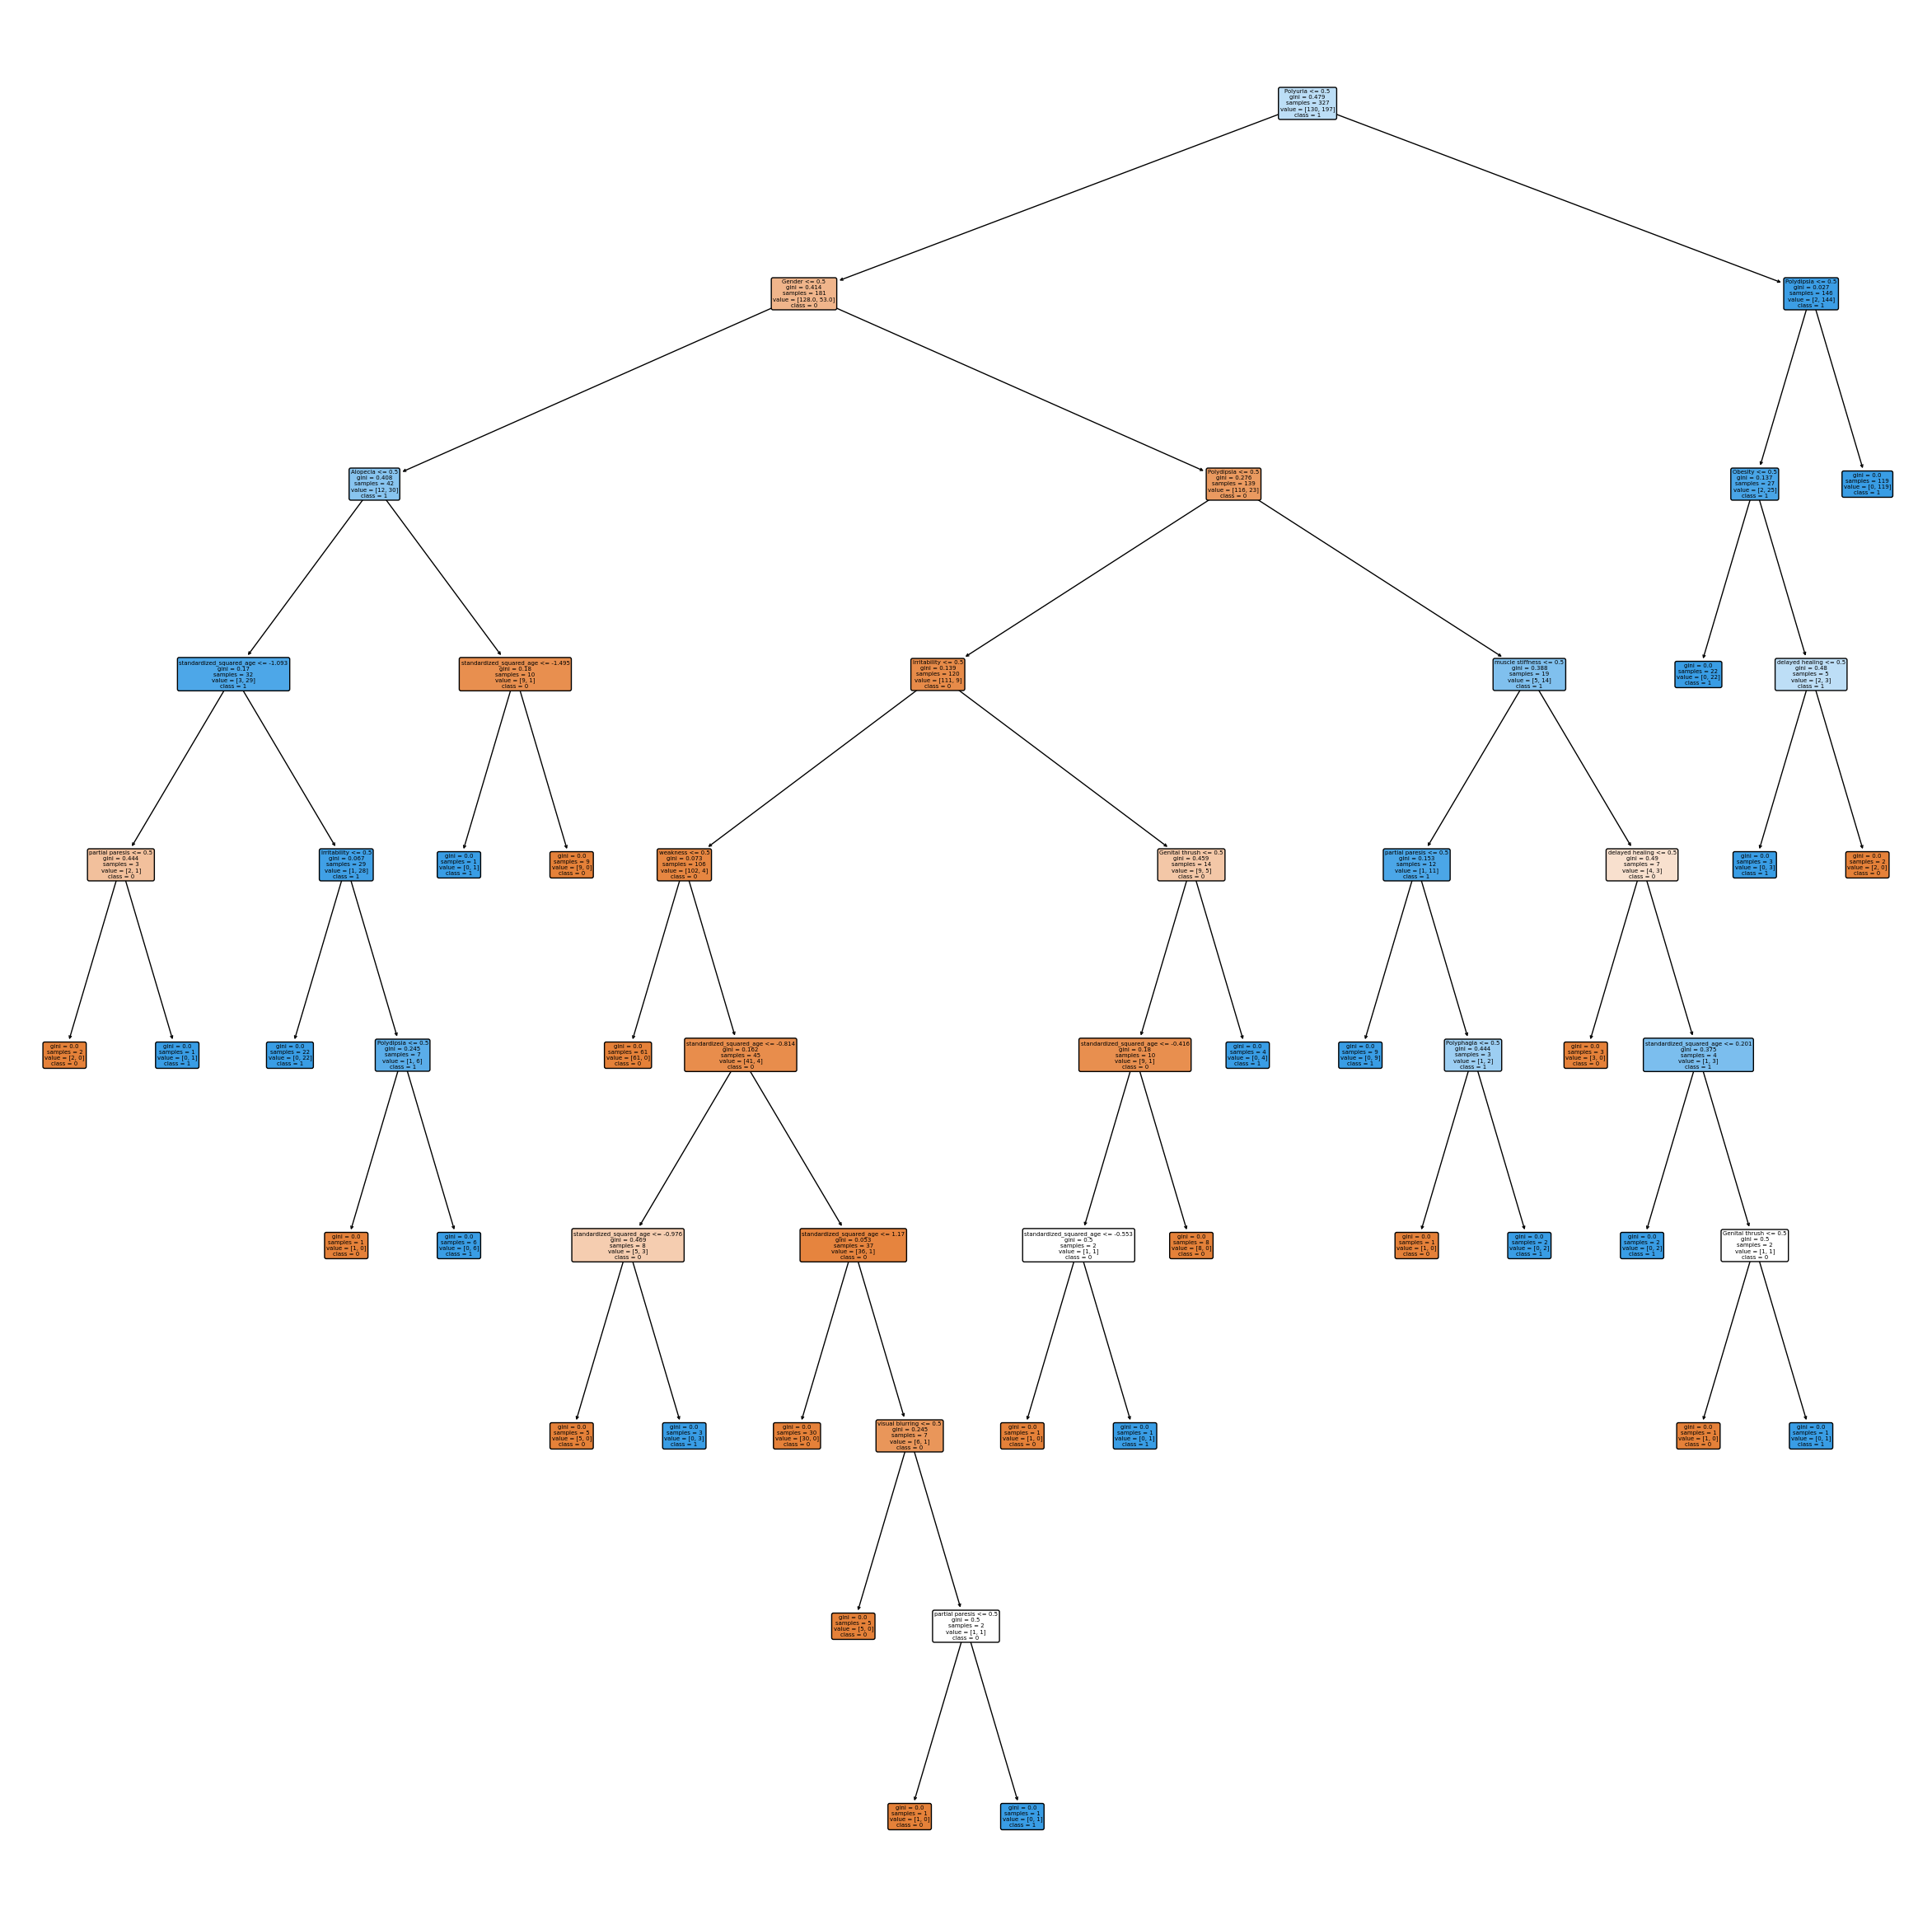

In [72]:
plt.figure(figsize=(30, 30))
plot_tree(DT_classifier, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)

In [73]:
#5 max depth, 5 min samples leaf, 5 min samples split
DT_clf_pruned_555 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

In [74]:
DT_clf_pruned_555.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

In [75]:
y_pred = DT_clf_pruned_555.predict(X_test)

In [76]:
y_test.value_counts()

class
1    87
0    54
Name: count, dtype: int64

In [77]:
accuracy_score(y_test, y_pred)
#worse accuraccy

0.9432624113475178

[Text(0.6510416666666666, 0.9166666666666666, 'Polyuria <= 0.5\ngini = 0.479\nsamples = 327\nvalue = [130, 197]\nclass = 1'),
 Text(0.3854166666666667, 0.75, 'Gender <= 0.5\ngini = 0.414\nsamples = 181\nvalue = [128.0, 53.0]\nclass = 0'),
 Text(0.16666666666666666, 0.5833333333333334, 'Alopecia <= 0.5\ngini = 0.408\nsamples = 42\nvalue = [12, 30]\nclass = 1'),
 Text(0.08333333333333333, 0.4166666666666667, 'standardized_squared_age <= -0.577\ngini = 0.17\nsamples = 32\nvalue = [3, 29]\nclass = 1'),
 Text(0.041666666666666664, 0.25, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = 1'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = 1'),
 Text(0.25, 0.4166666666666667, 'visual blurring <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = 0'),
 Text(0.20833333333333334, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.2916666666666667, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text(0.6041666666666666, 0.583333333333

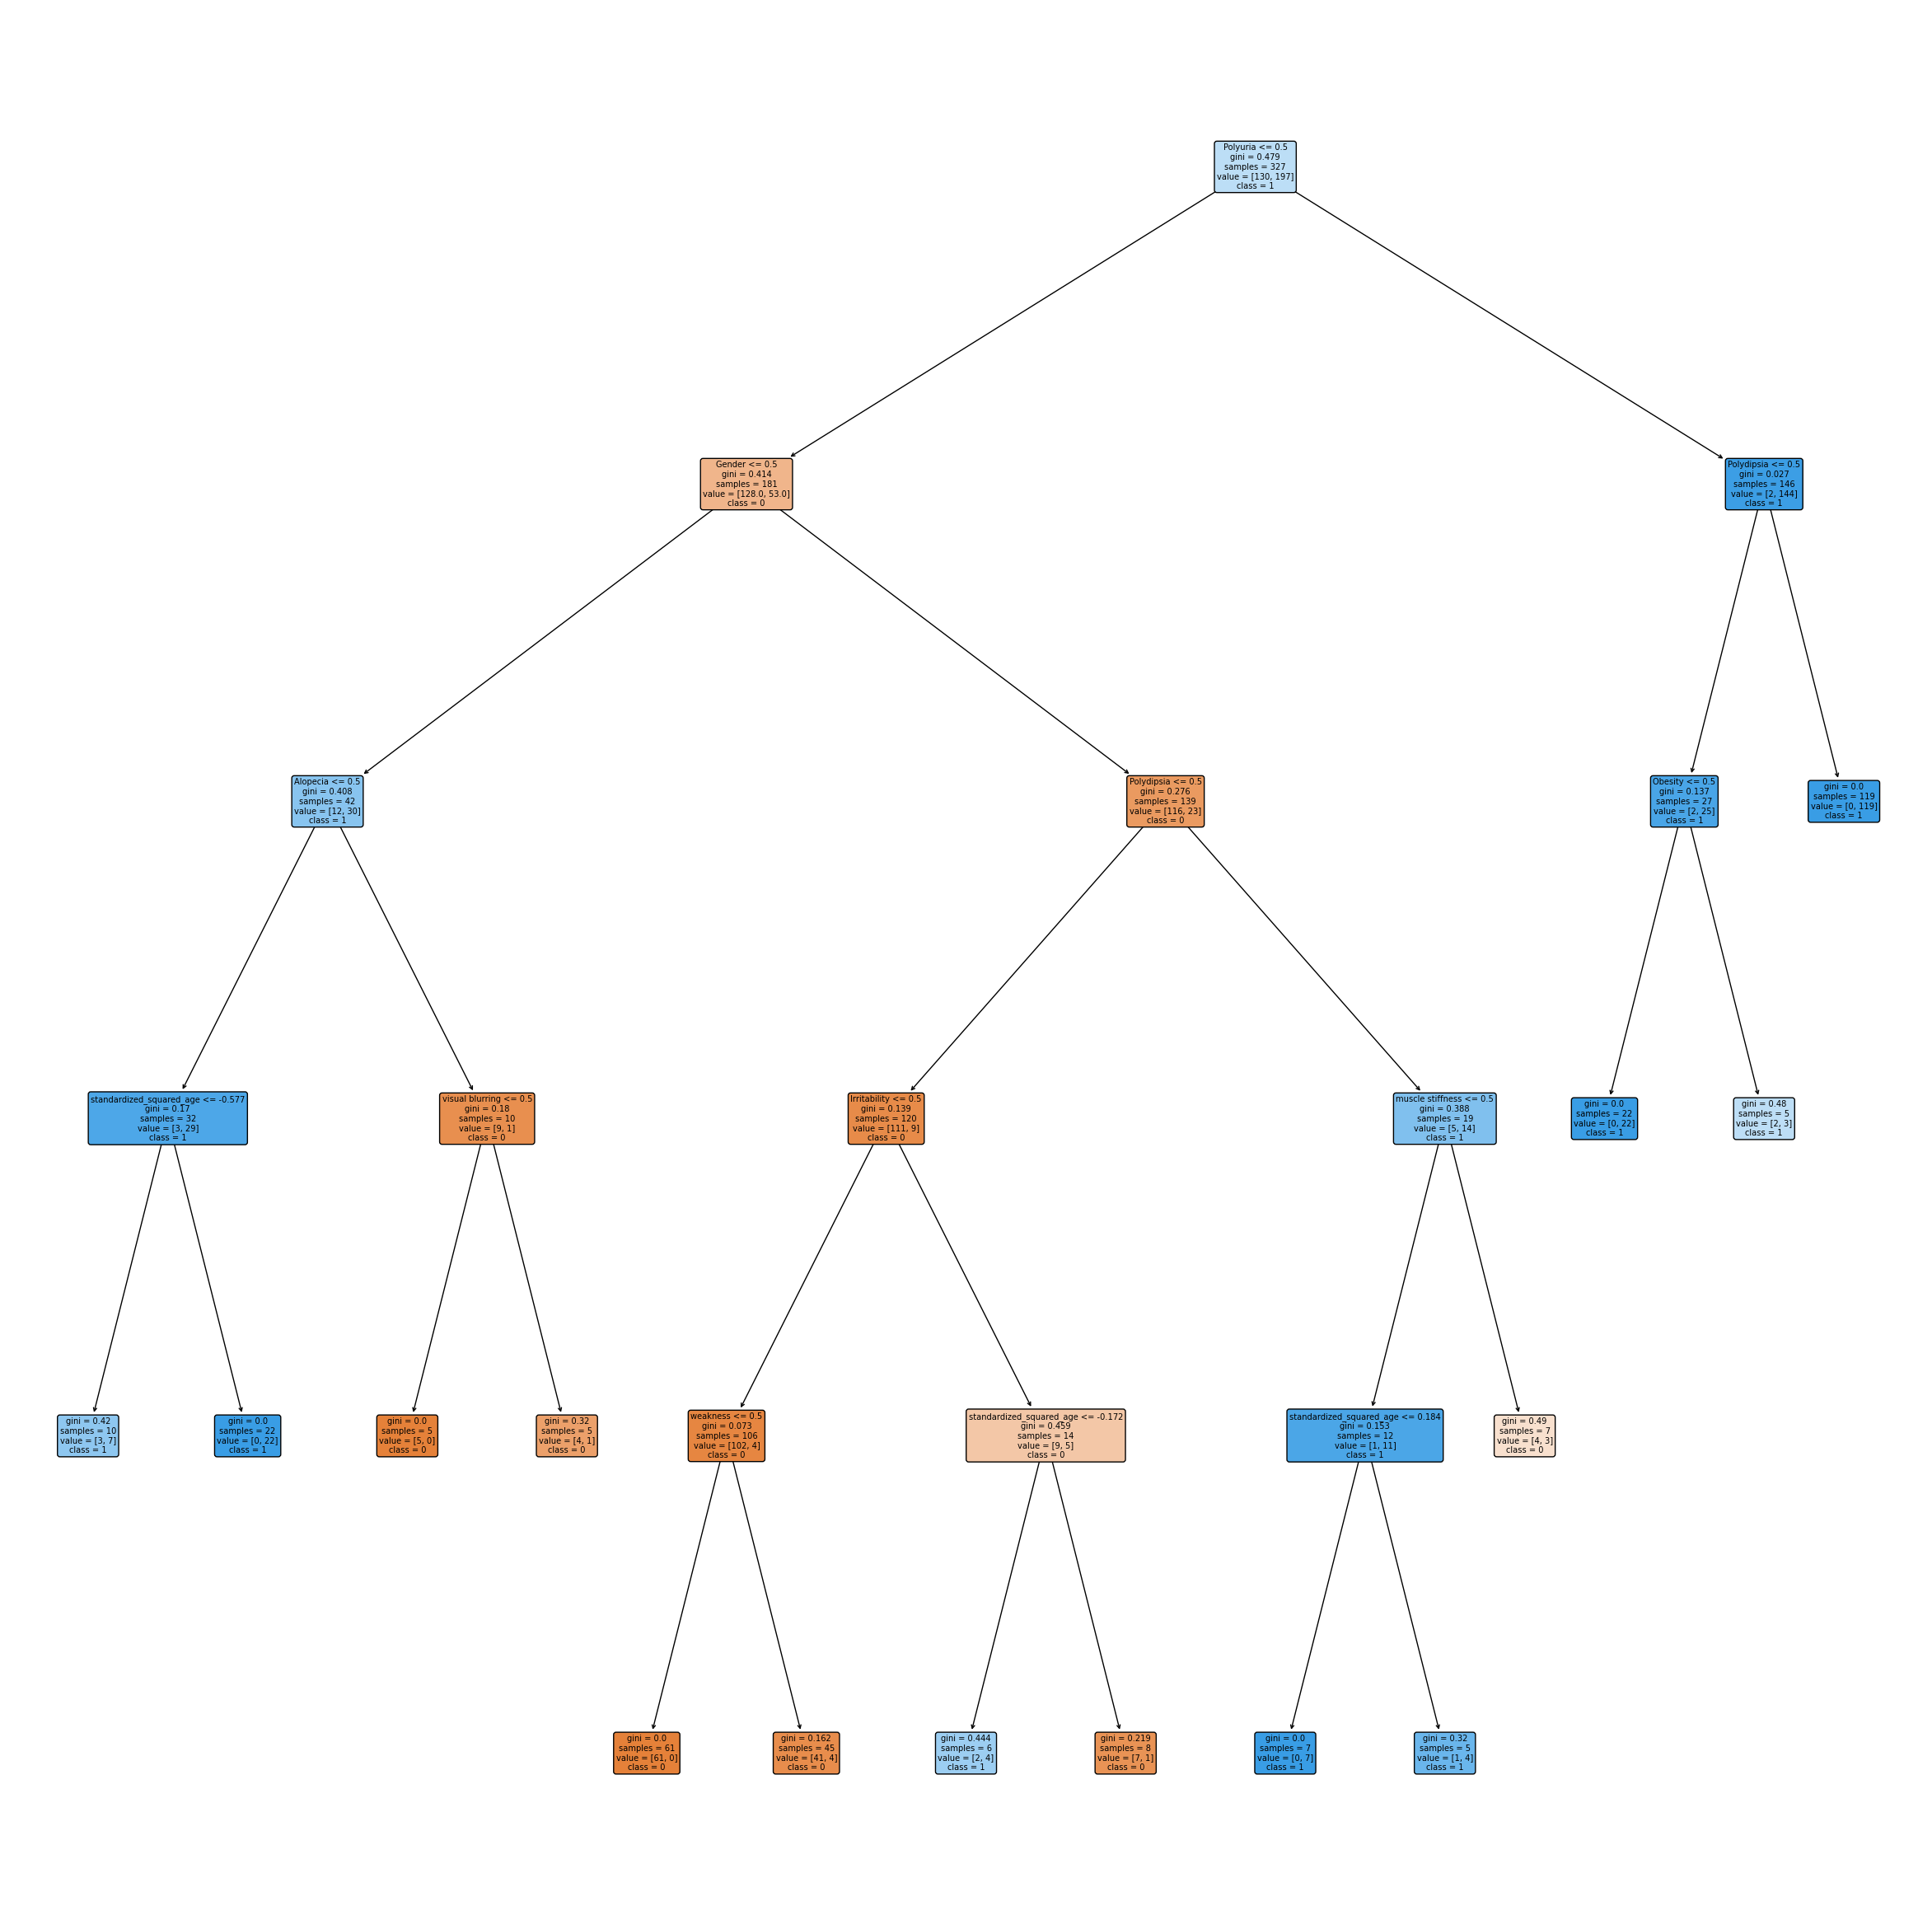

In [78]:
plt.figure(figsize=(30, 30))
plot_tree(DT_clf_pruned_555, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)

In [79]:
#10 max depth, 10 min samples leaf, 10 min samples split
DT_clf_pruned_10 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10)

In [80]:
DT_clf_pruned_10.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10)

In [81]:
y_pred = DT_clf_pruned_10.predict(X_test)

In [82]:
y_test.value_counts()

class
1    87
0    54
Name: count, dtype: int64

In [83]:
accuracy_score(y_test, y_pred)
#worse accuracy

0.9219858156028369

[Text(0.6071428571428571, 0.9285714285714286, 'Polyuria <= 0.5\ngini = 0.479\nsamples = 327\nvalue = [130, 197]\nclass = 1'),
 Text(0.35714285714285715, 0.7857142857142857, 'Gender <= 0.5\ngini = 0.414\nsamples = 181\nvalue = [128.0, 53.0]\nclass = 0'),
 Text(0.21428571428571427, 0.6428571428571429, 'Alopecia <= 0.5\ngini = 0.408\nsamples = 42\nvalue = [12, 30]\nclass = 1'),
 Text(0.14285714285714285, 0.5, 'standardized_squared_age <= -0.577\ngini = 0.17\nsamples = 32\nvalue = [3, 29]\nclass = 1'),
 Text(0.07142857142857142, 0.35714285714285715, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = 1'),
 Text(0.21428571428571427, 0.35714285714285715, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = 1'),
 Text(0.2857142857142857, 0.5, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = 0'),
 Text(0.5, 0.6428571428571429, 'Polydipsia <= 0.5\ngini = 0.276\nsamples = 139\nvalue = [116, 23]\nclass = 0'),
 Text(0.42857142857142855, 0.5, 'Irritability <= 0.5\ngini = 0.139\nsamples = 120\nval

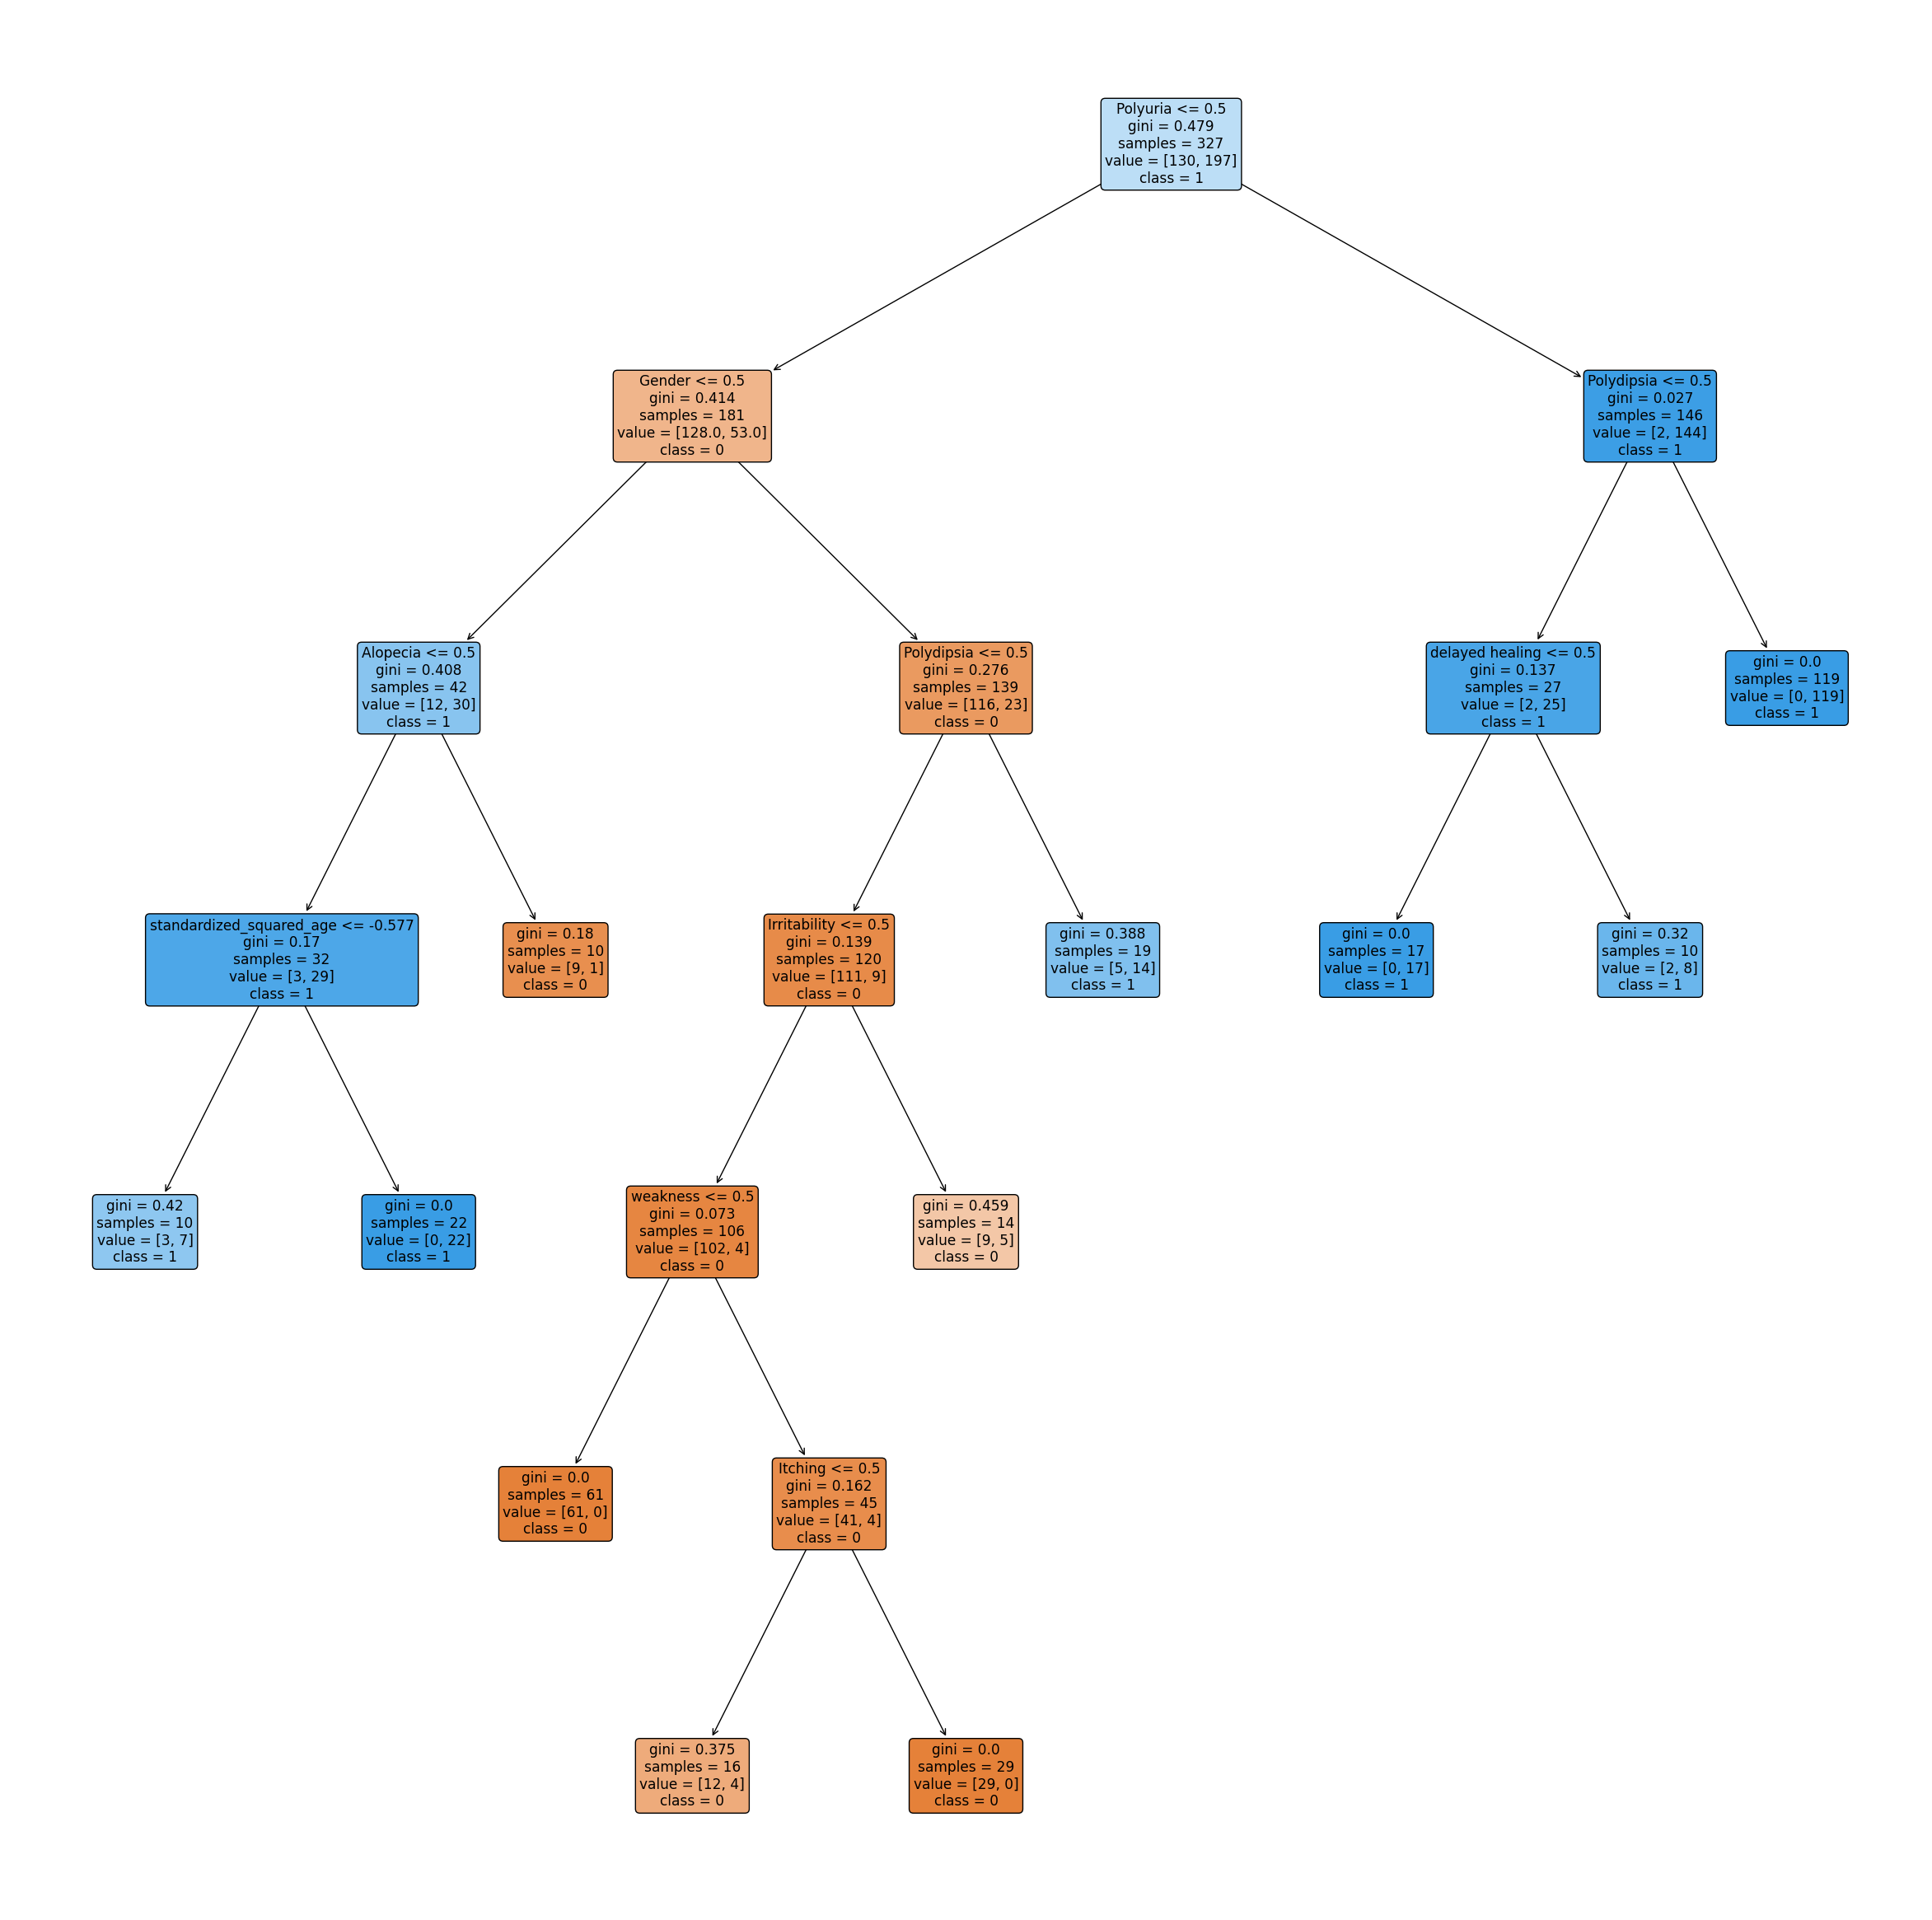

In [84]:
plt.figure(figsize=(30, 30))
plot_tree(DT_clf_pruned_10, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)

In [85]:
#3 max depth, 3 min samples leaf, 3 min samples split
DT_clf_pruned_3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

In [86]:
DT_clf_pruned_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

In [87]:
y_pred = DT_clf_pruned_3.predict(X_test)

In [88]:
y_test.value_counts()

class
1    87
0    54
Name: count, dtype: int64

In [89]:
accuracy_score(y_test, y_pred)
#worse accuraccy

0.9219858156028369

[Text(0.5769230769230769, 0.875, 'Polyuria <= 0.5\ngini = 0.479\nsamples = 327\nvalue = [130, 197]\nclass = 1'),
 Text(0.3076923076923077, 0.625, 'Gender <= 0.5\ngini = 0.414\nsamples = 181\nvalue = [128.0, 53.0]\nclass = 0'),
 Text(0.15384615384615385, 0.375, 'Alopecia <= 0.5\ngini = 0.408\nsamples = 42\nvalue = [12, 30]\nclass = 1'),
 Text(0.07692307692307693, 0.125, 'gini = 0.17\nsamples = 32\nvalue = [3, 29]\nclass = 1'),
 Text(0.23076923076923078, 0.125, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = 0'),
 Text(0.46153846153846156, 0.375, 'Polydipsia <= 0.5\ngini = 0.276\nsamples = 139\nvalue = [116, 23]\nclass = 0'),
 Text(0.38461538461538464, 0.125, 'gini = 0.139\nsamples = 120\nvalue = [111, 9]\nclass = 0'),
 Text(0.5384615384615384, 0.125, 'gini = 0.388\nsamples = 19\nvalue = [5, 14]\nclass = 1'),
 Text(0.8461538461538461, 0.625, 'Polydipsia <= 0.5\ngini = 0.027\nsamples = 146\nvalue = [2, 144]\nclass = 1'),
 Text(0.7692307692307693, 0.375, 'Obesity <= 0.5\ngini = 0.137\n

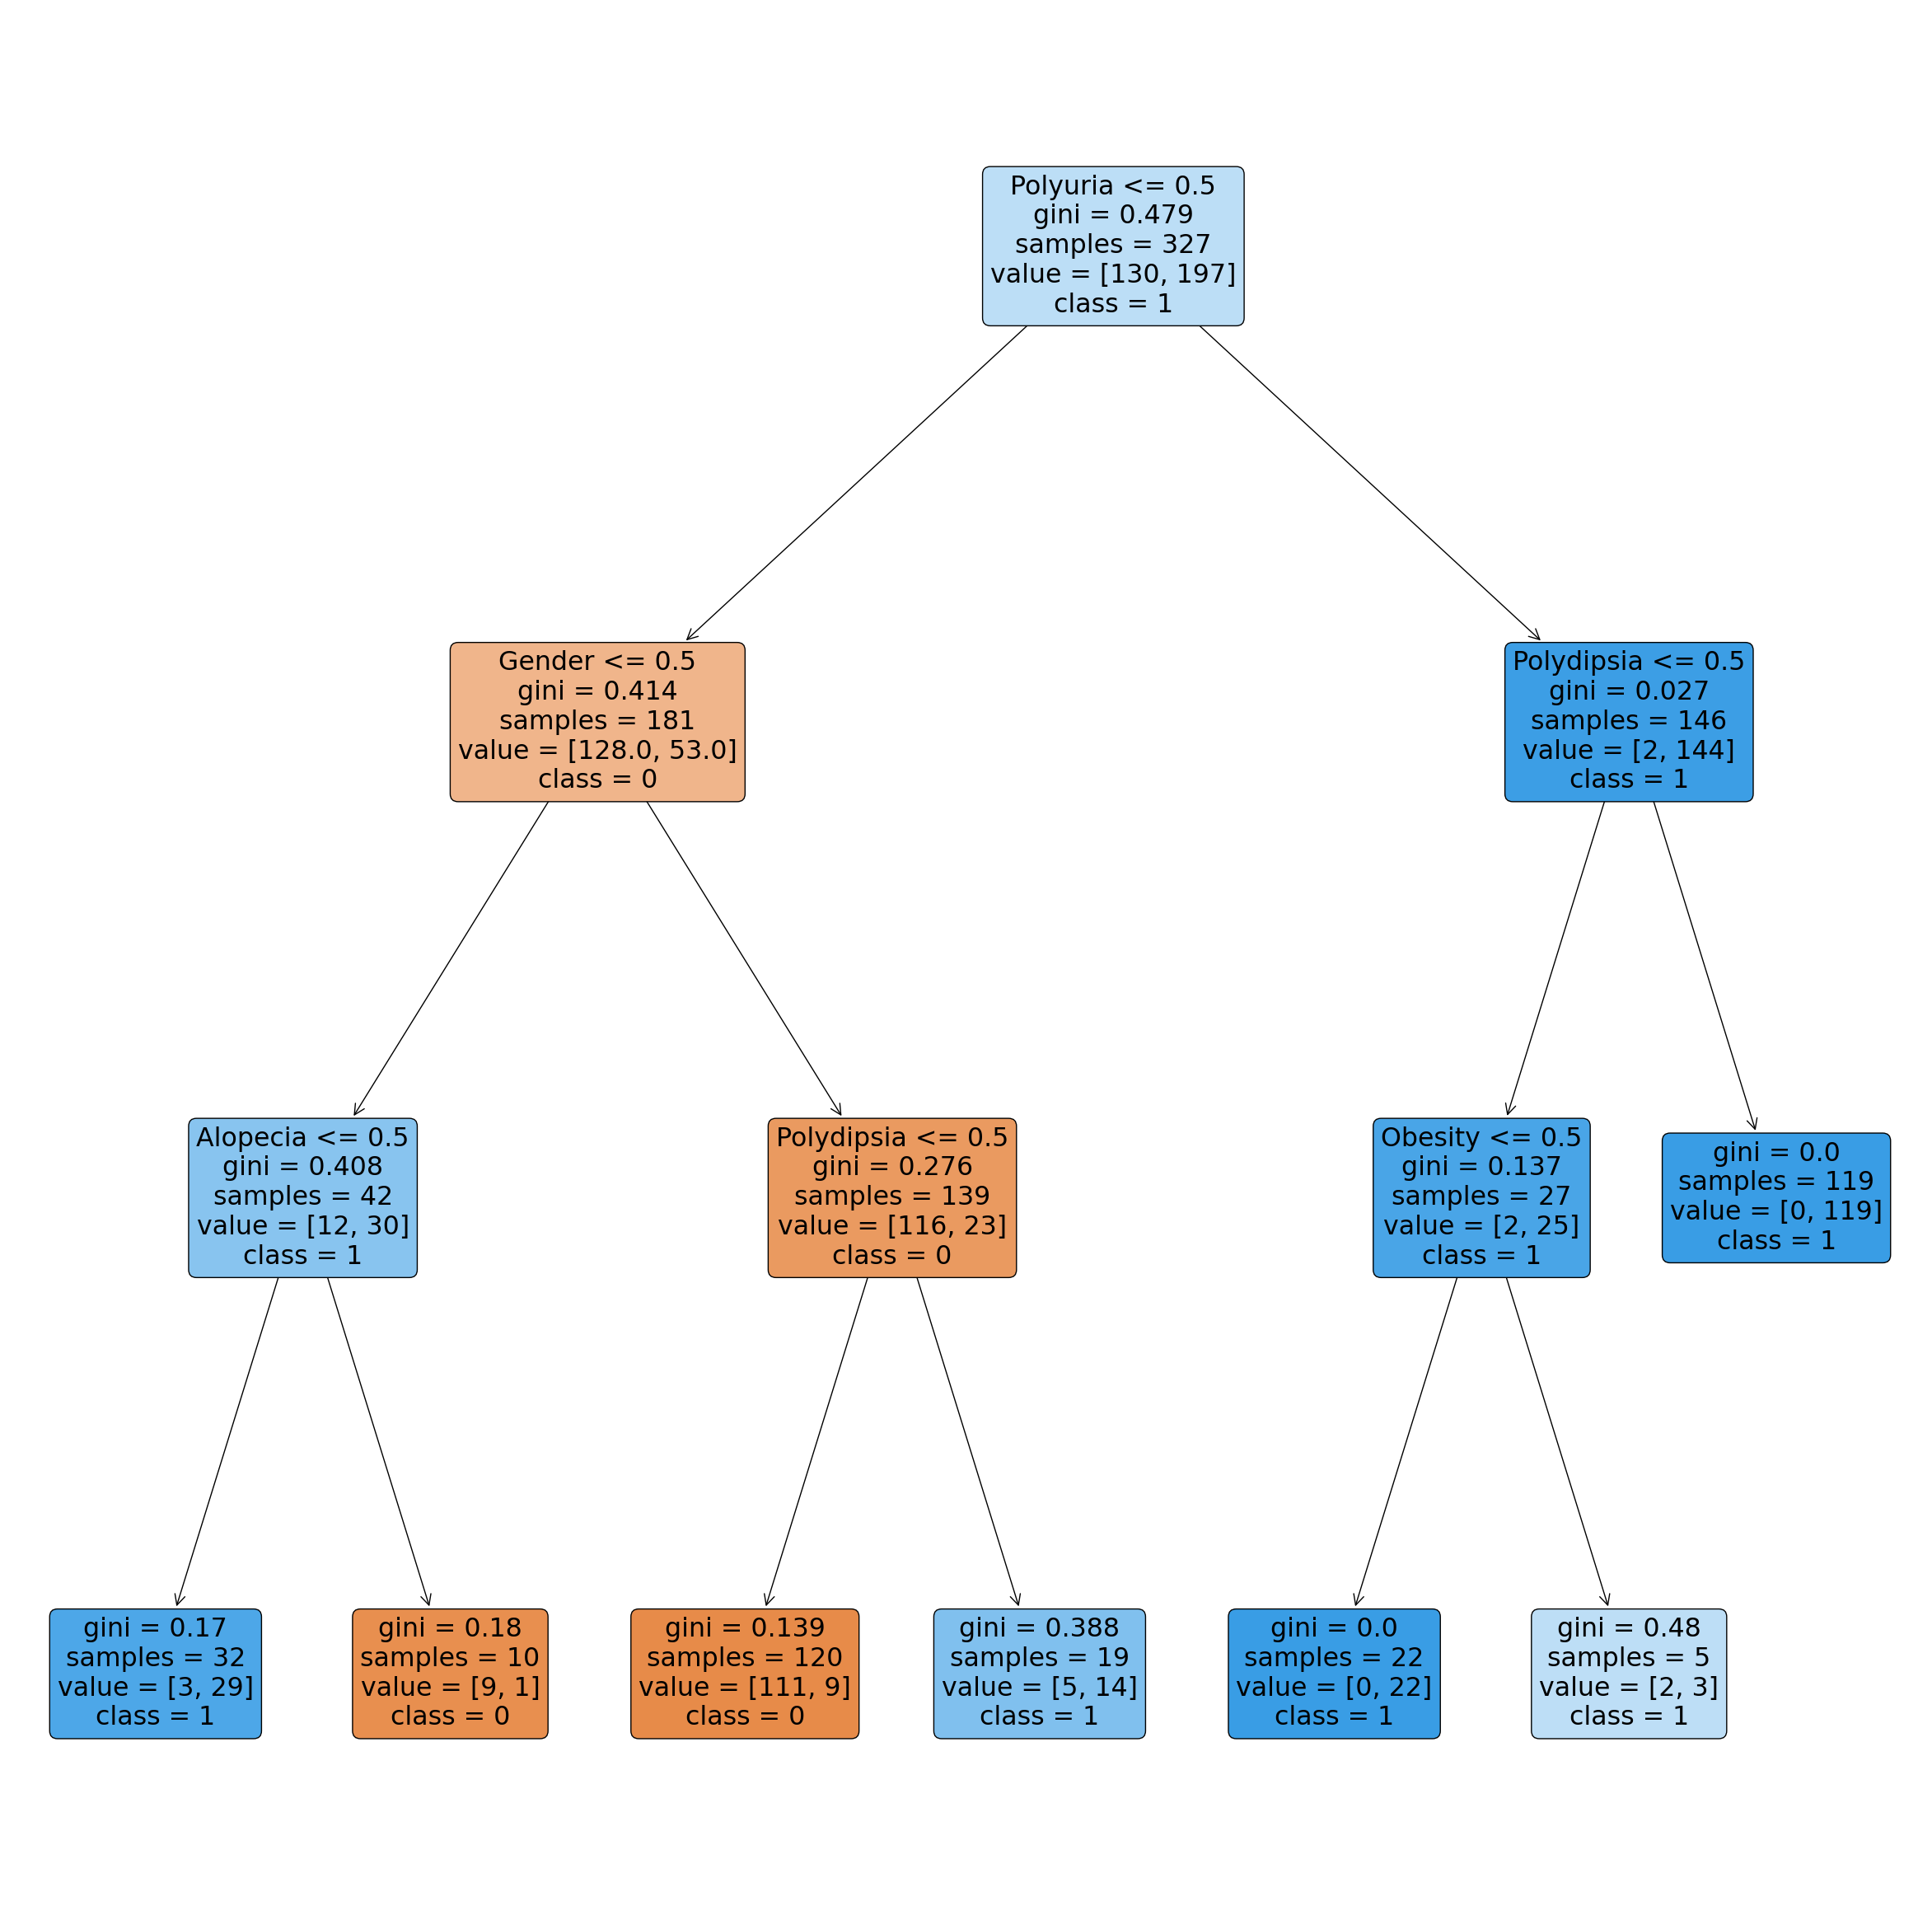

In [90]:
plt.figure(figsize=(30, 30))
plot_tree(DT_clf_pruned_3, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)

In [91]:
#Build ensemble method: Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=99)

#Train the model
gb_clf.fit(X_train, y_train)

#Predict on the testing data
y_pred_gb = gb_clf.predict(X_test)

#Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

#Display accuracy and classification report
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)

Gradient Boosting Classifier:
Accuracy: 0.9787234042553191


In [92]:
#Build ensemble method: Bagging
#use pruned tree (5 max depth, 5 min leaf, 5 min splits)
base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

#testing different estimators
#two estimators
BG_clf_2est = BaggingClassifier(estimator = base_estimator, n_estimators=2, random_state=99)
BG_clf_2est.fit(X_train, y_train)

#five estimators
BG_clf_5est = BaggingClassifier(estimator = base_estimator, n_estimators=5, random_state=99)
BG_clf_5est.fit(X_train, y_train)

#ten estimators
BG_clf_10est = BaggingClassifier(estimator = base_estimator, n_estimators=10, random_state=99)
BG_clf_10est.fit(X_train, y_train)

#twenty five estimators
BG_clf_25est = BaggingClassifier(estimator = base_estimator, n_estimators=25, random_state=99)
BG_clf_25est.fit(X_train, y_train)

#fifty estimators
BG_clf_50est = BaggingClassifier(estimator = base_estimator, n_estimators=50, random_state=99)
BG_clf_50est.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   min_samples_leaf=5,
                                                   min_samples_split=5),
                  n_estimators=50, random_state=99)

In [93]:
print(f"Accuracy score for two estimators: {accuracy_score(y_test, BG_clf_2est.predict(X_test))}")
print(f"Accuracy score for five estimators: {accuracy_score(y_test, BG_clf_5est.predict(X_test))}")
print(f"Accuracy score for ten estimators: {accuracy_score(y_test, BG_clf_10est.predict(X_test))}")
print(f"Accuracy score for twentyfive estimators: {accuracy_score(y_test, BG_clf_25est.predict(X_test))}")
print(f"Accuracy score for fifty estimators: {accuracy_score(y_test, BG_clf_50est.predict(X_test))}")
#pretty good results!

Accuracy score for two estimators: 0.9219858156028369
Accuracy score for five estimators: 0.9219858156028369
Accuracy score for ten estimators: 0.9219858156028369
Accuracy score for twentyfive estimators: 0.9219858156028369
Accuracy score for fifty estimators: 0.9361702127659575


In [94]:
#testing estimators with unpruned trees (what is typically done)
base_estimator = DecisionTreeClassifier( random_state=99)

#testing different estimators
#two estimators
BG_clf_2est_unp = BaggingClassifier(estimator = base_estimator, n_estimators=2, random_state=99)
BG_clf_2est_unp .fit(X_train, y_train)

#five estimators
BG_clf_5est_unp  = BaggingClassifier(estimator = base_estimator, n_estimators=5, random_state=99)
BG_clf_5est_unp .fit(X_train, y_train)

#ten estimators
BG_clf_10est_unp  = BaggingClassifier(estimator = base_estimator, n_estimators=10, random_state=99)
BG_clf_10est_unp .fit(X_train, y_train)

#twenty five estimators
BG_clf_25est_unp  = BaggingClassifier(estimator = base_estimator, n_estimators=25, random_state=99)
BG_clf_25est_unp .fit(X_train, y_train)

#fifty estimators
BG_clf_50est_unp  = BaggingClassifier(estimator = base_estimator, n_estimators=50, random_state=99)
BG_clf_50est_unp .fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=99),
                  n_estimators=50, random_state=99)

In [95]:
print(f"Accuracy score for two estimators: {accuracy_score(y_test, BG_clf_2est_unp.predict(X_test))}")
print(f"Accuracy score for five estimators: {accuracy_score(y_test, BG_clf_5est_unp.predict(X_test))}")
print(f"Accuracy score for ten estimators: {accuracy_score(y_test, BG_clf_10est_unp.predict(X_test))}")
print(f"Accuracy score for twentyfive estimators: {accuracy_score(y_test, BG_clf_25est_unp.predict(X_test))}")
print(f"Accuracy score for fifty estimators: {accuracy_score(y_test, BG_clf_50est_unp.predict(X_test))}")
#even better results!

Accuracy score for two estimators: 0.9361702127659575
Accuracy score for five estimators: 0.9574468085106383
Accuracy score for ten estimators: 0.9858156028368794
Accuracy score for twentyfive estimators: 0.9858156028368794
Accuracy score for fifty estimators: 0.9858156028368794


In [96]:
#Build a random forest - unpruned
RF_clf = RandomForestClassifier(n_estimators=50, random_state=99)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9787234042553191

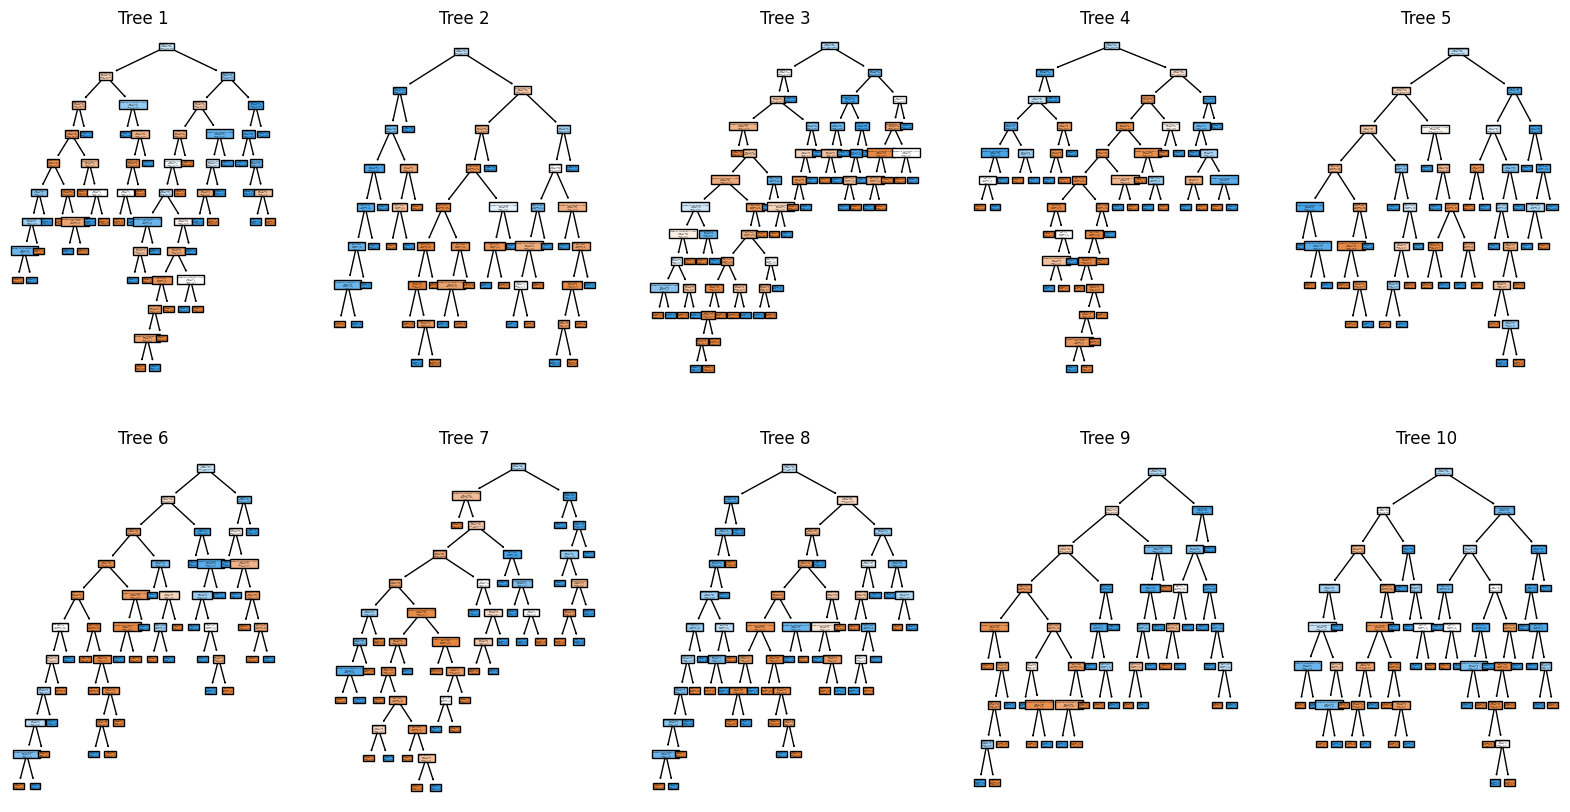

In [97]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.5861486486486487, 0.9583333333333334, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.3581081081081081, 0.875, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.25675675675675674, 0.7916666666666666, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.22972972972972974, 0.7083333333333334, 'Alopecia <= 0.5\ngini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.16216216216216217, 0.625, 'Gender <= 0.5\ngini = 0.19\nsamples = 39\nvalue = [59, 7]\nclass = 0'),
 Text(0.10810810810810811, 0.5416666666666666, 'Genital thrush <= 0.5\ngini = 0.408\nsamples = 5\nvalue = [2, 5]\nclass = 1'),
 Text(0.08108108108108109, 0.4583333333333333, 'sudden weight loss <= 0.5\ngini = 0.444\nsamples = 4\nvalue = [2, 4]\nclass = 1'),
 Text(0.05405405405405406, 0.375, 'standardized_squared_age <= -1.13\ngini = 0.32\nsamples = 3\nvalue = [1, 4]\nclass = 1'),
 Text(0.02702702702702703, 0

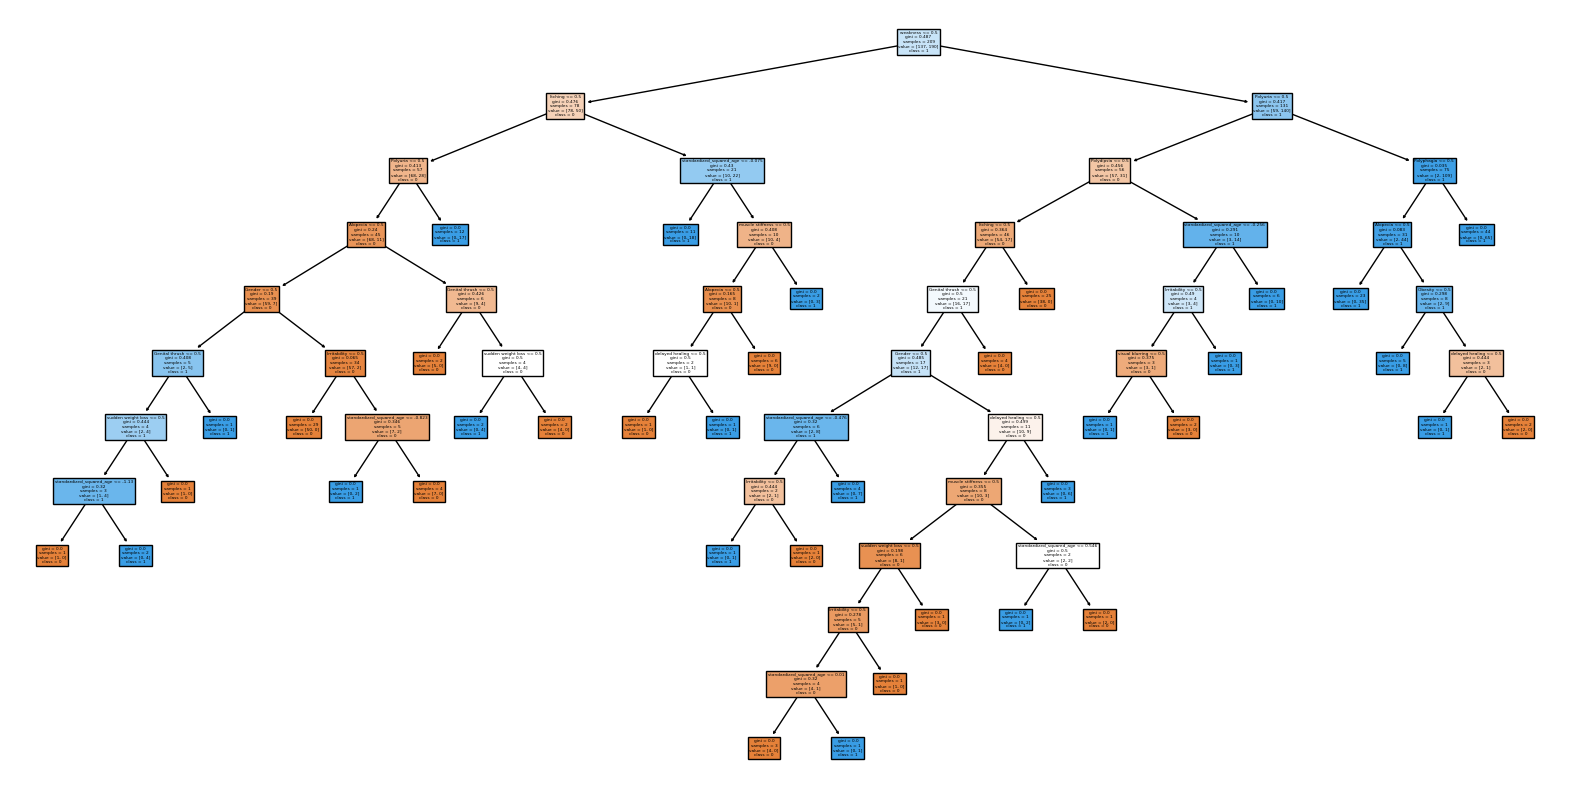

In [98]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

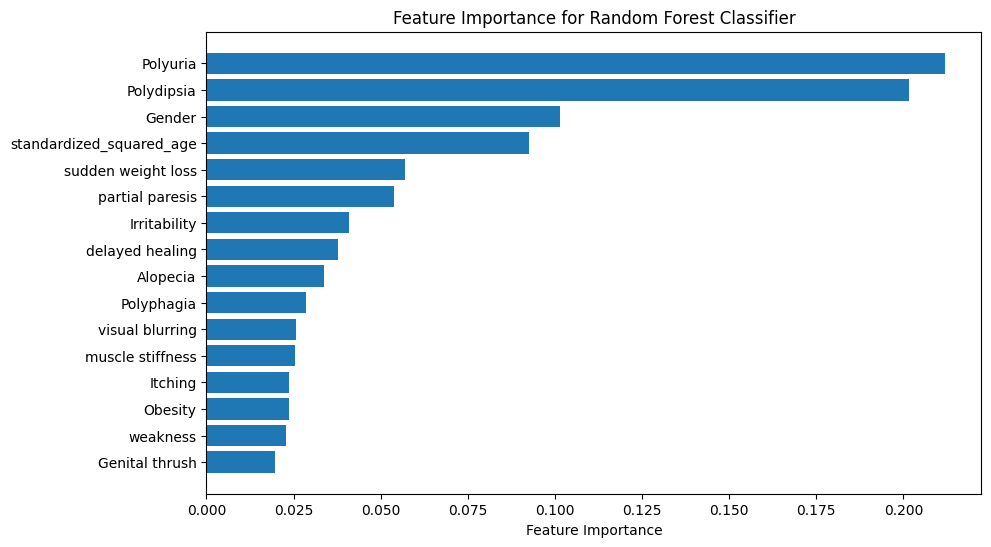

In [99]:
feature_importance = RF_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [100]:
#Testing different depths, min leaf, min split in random forest

In [101]:
#Build a random forest - 5 max depth, min leaf, min split
RF_clf_5 = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=5, min_samples_split=5, random_state=99)
RF_clf_5.fit(X_train, y_train)
RF_clf_5.score(X_test, y_test)

0.9361702127659575

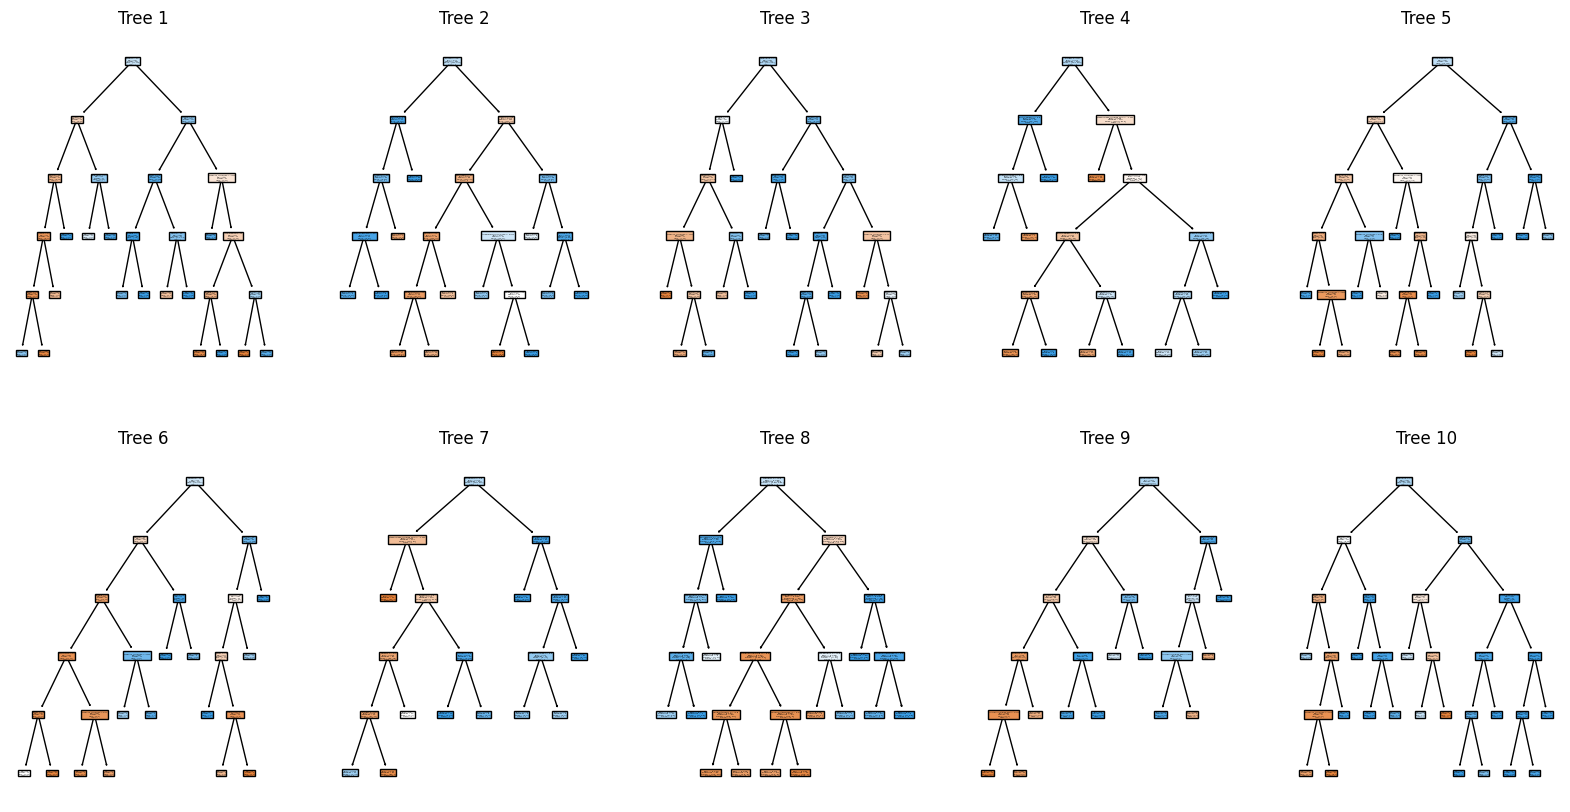

In [102]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf_5.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_5.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.4583333333333333, 0.9166666666666666, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.25, 0.75, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.16666666666666666, 0.5833333333333334, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.125, 0.4166666666666667, 'Alopecia <= 0.5\ngini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.08333333333333333, 0.25, 'Gender <= 0.5\ngini = 0.19\nsamples = 39\nvalue = [59, 7]\nclass = 0'),
 Text(0.041666666666666664, 0.08333333333333333, 'gini = 0.408\nsamples = 5\nvalue = [2, 5]\nclass = 1'),
 Text(0.125, 0.08333333333333333, 'gini = 0.065\nsamples = 34\nvalue = [57, 2]\nclass = 0'),
 Text(0.16666666666666666, 0.25, 'gini = 0.426\nsamples = 6\nvalue = [9, 4]\nclass = 0'),
 Text(0.20833333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [0, 17]\nclass = 1'),
 Text(0.3333333333333333, 0.5833333333333334, 'p

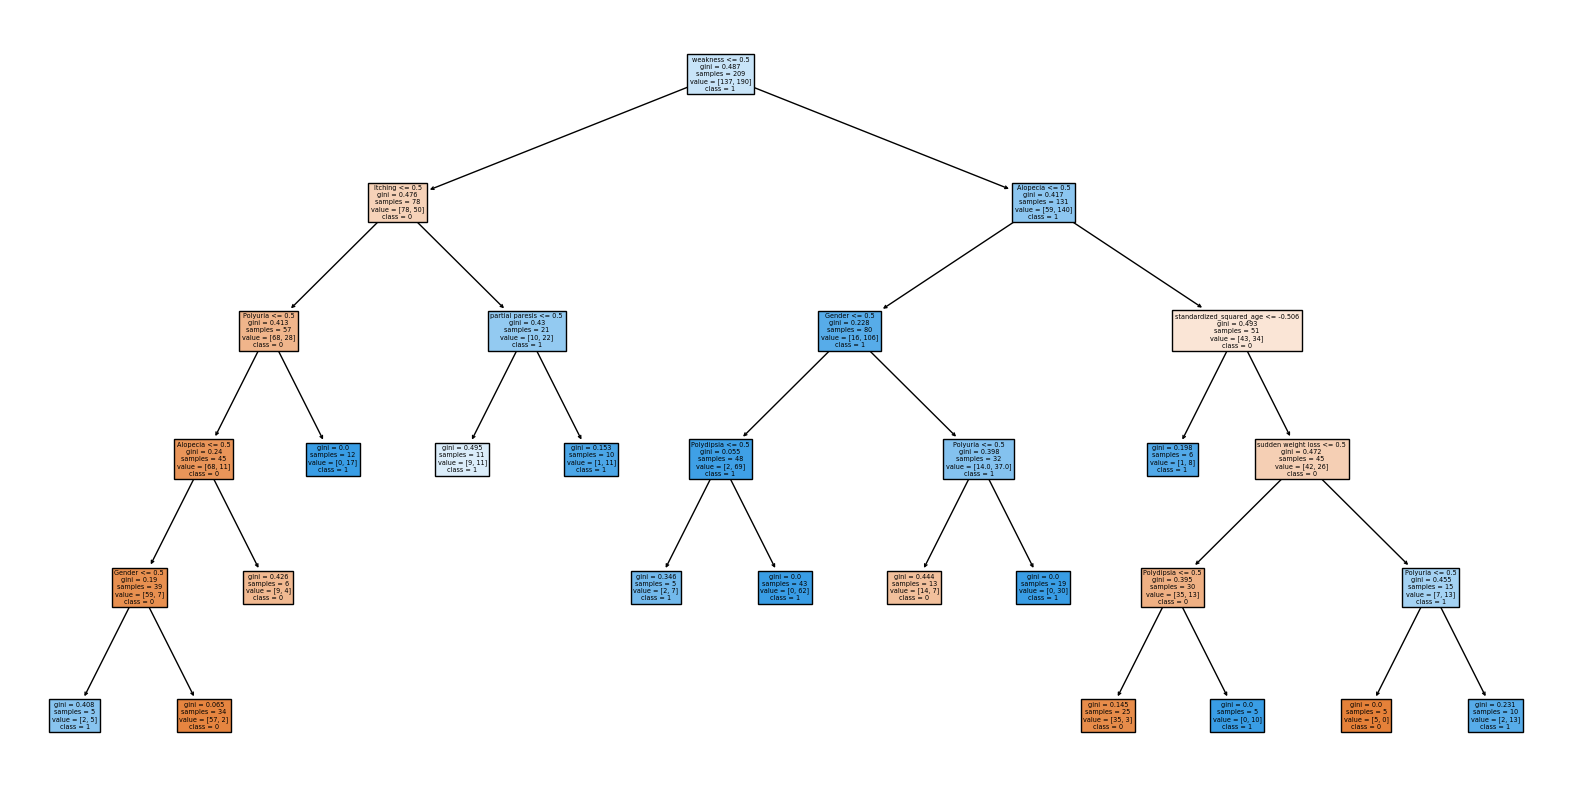

In [103]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf_5.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

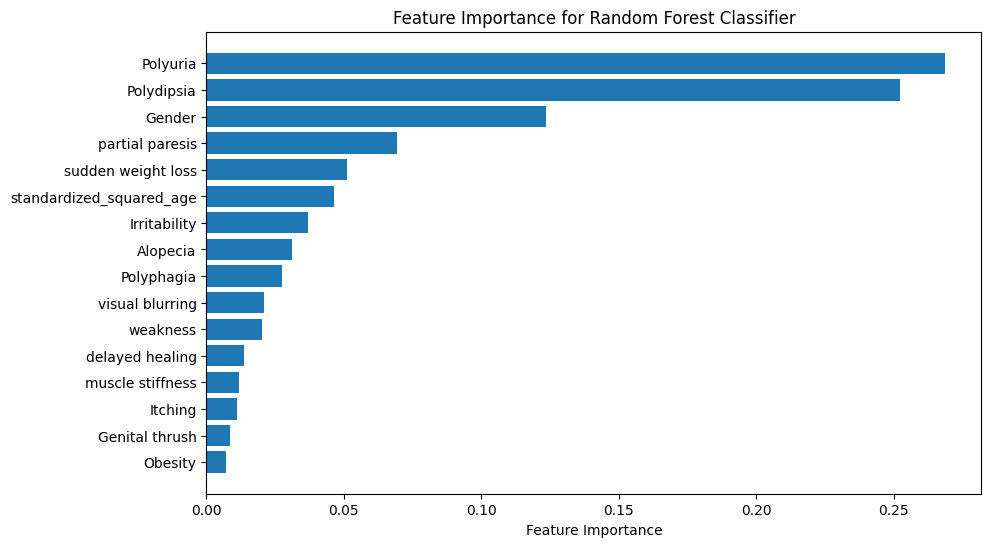

In [104]:
feature_importance = RF_clf_5.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [105]:
#Build a random forest - 10 max depth, min leaf, min split
RF_clf_10 = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=99)
RF_clf_10.fit(X_train, y_train)
RF_clf_10.score(X_test, y_test)

0.9290780141843972

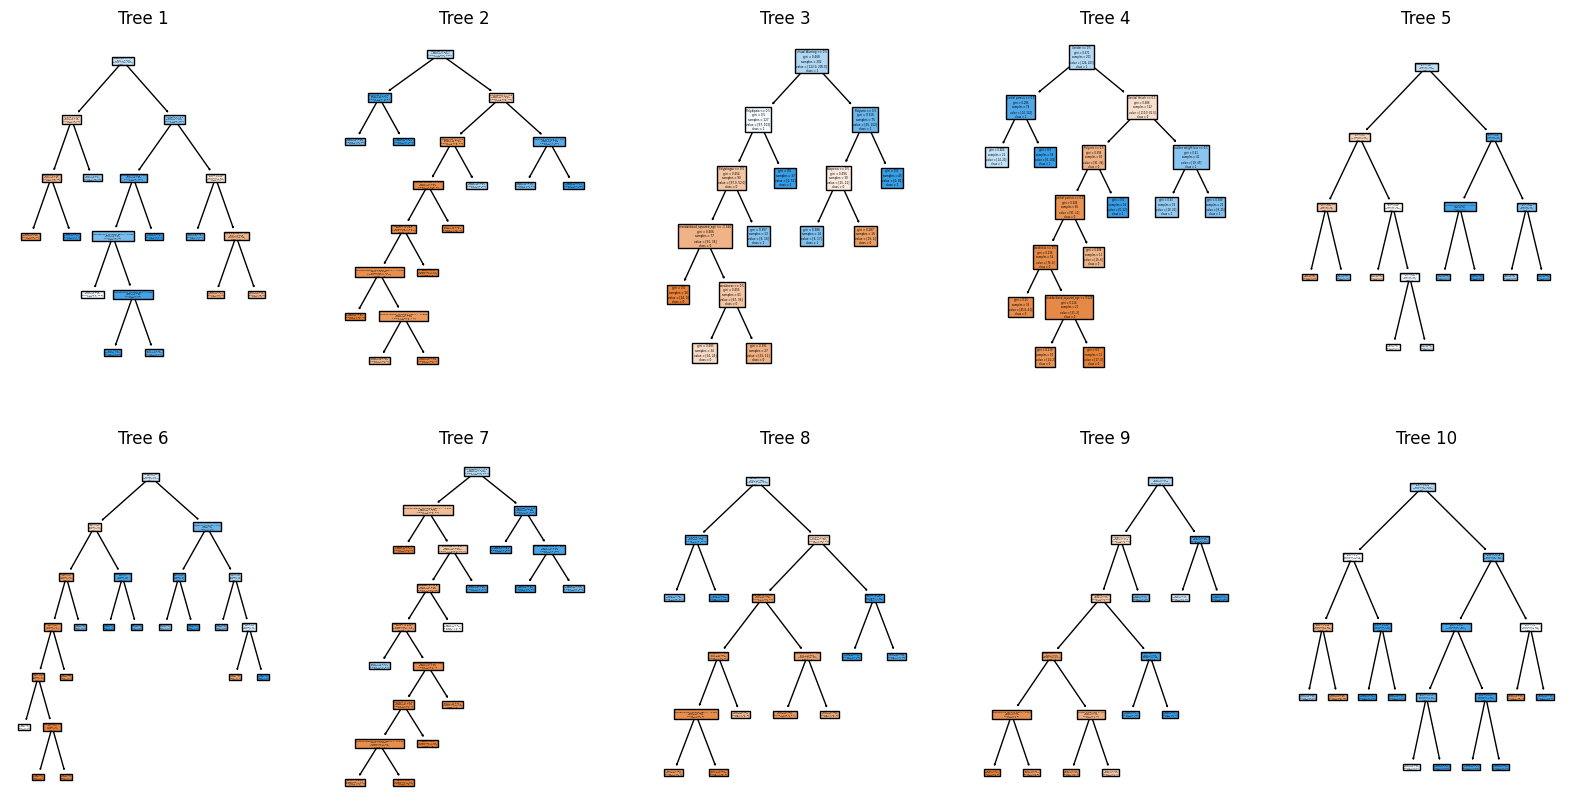

In [106]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf_10.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_10.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.4230769230769231, 0.9166666666666666, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.23076923076923078, 0.75, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.15384615384615385, 0.5833333333333334, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [0, 17]\nclass = 1'),
 Text(0.3076923076923077, 0.5833333333333334, 'gini = 0.43\nsamples = 21\nvalue = [10, 22]\nclass = 1'),
 Text(0.6153846153846154, 0.75, 'Alopecia <= 0.5\ngini = 0.417\nsamples = 131\nvalue = [59, 140]\nclass = 1'),
 Text(0.46153846153846156, 0.5833333333333334, 'delayed healing <= 0.5\ngini = 0.228\nsamples = 80\nvalue = [16, 106]\nclass = 1'),
 Text(0.38461538461538464, 0.4166666666666667, 'standardized_squared_age <= -0.599\

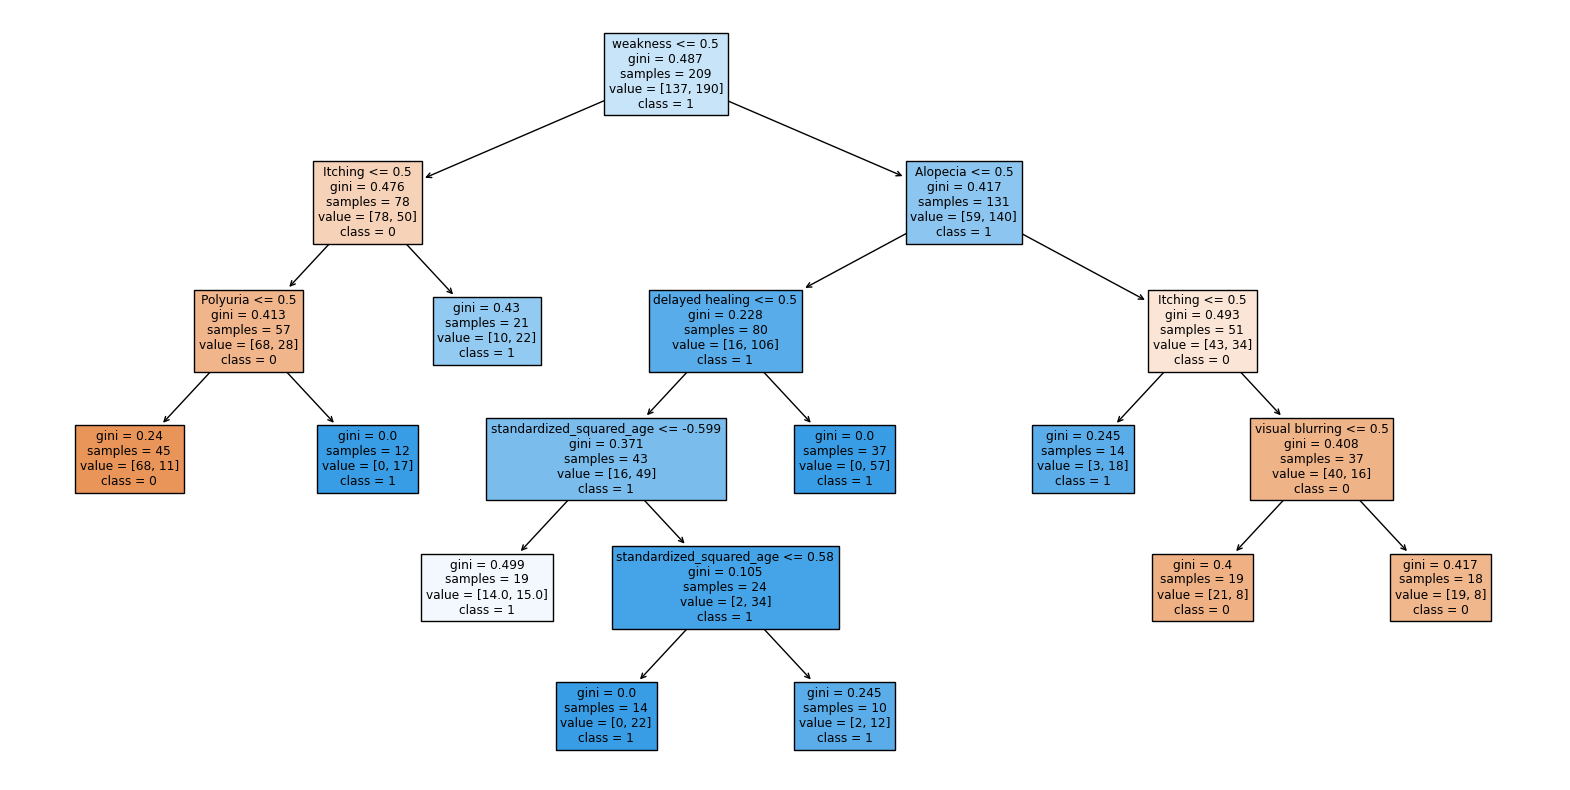

In [107]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf_10.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

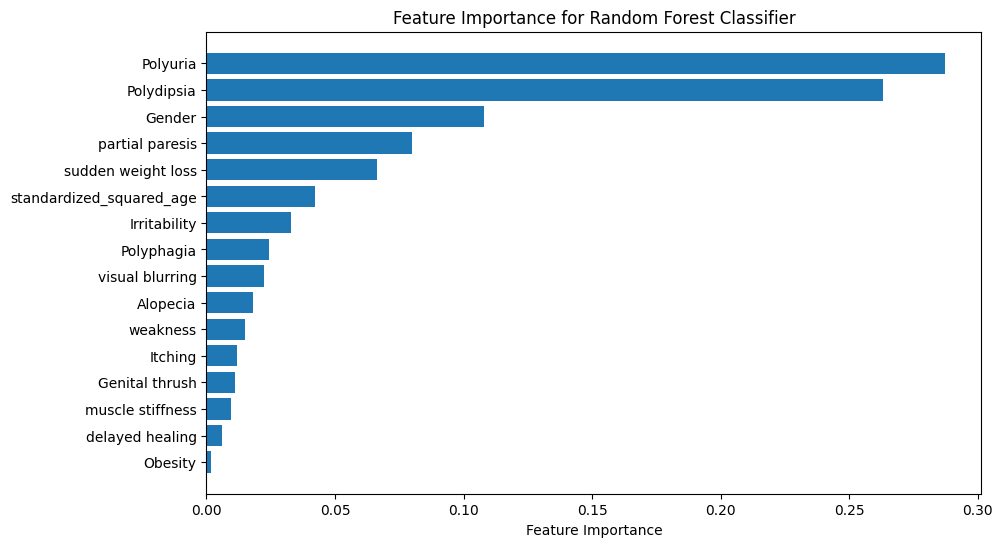

In [108]:
feature_importance = RF_clf_10.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [109]:
#Build a random forest - 3 max depth, min leaf, min split
RF_clf_3 = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=3, min_samples_split=3, random_state=99)
RF_clf_3.fit(X_train, y_train)
RF_clf_3.score(X_test, y_test)

0.9219858156028369

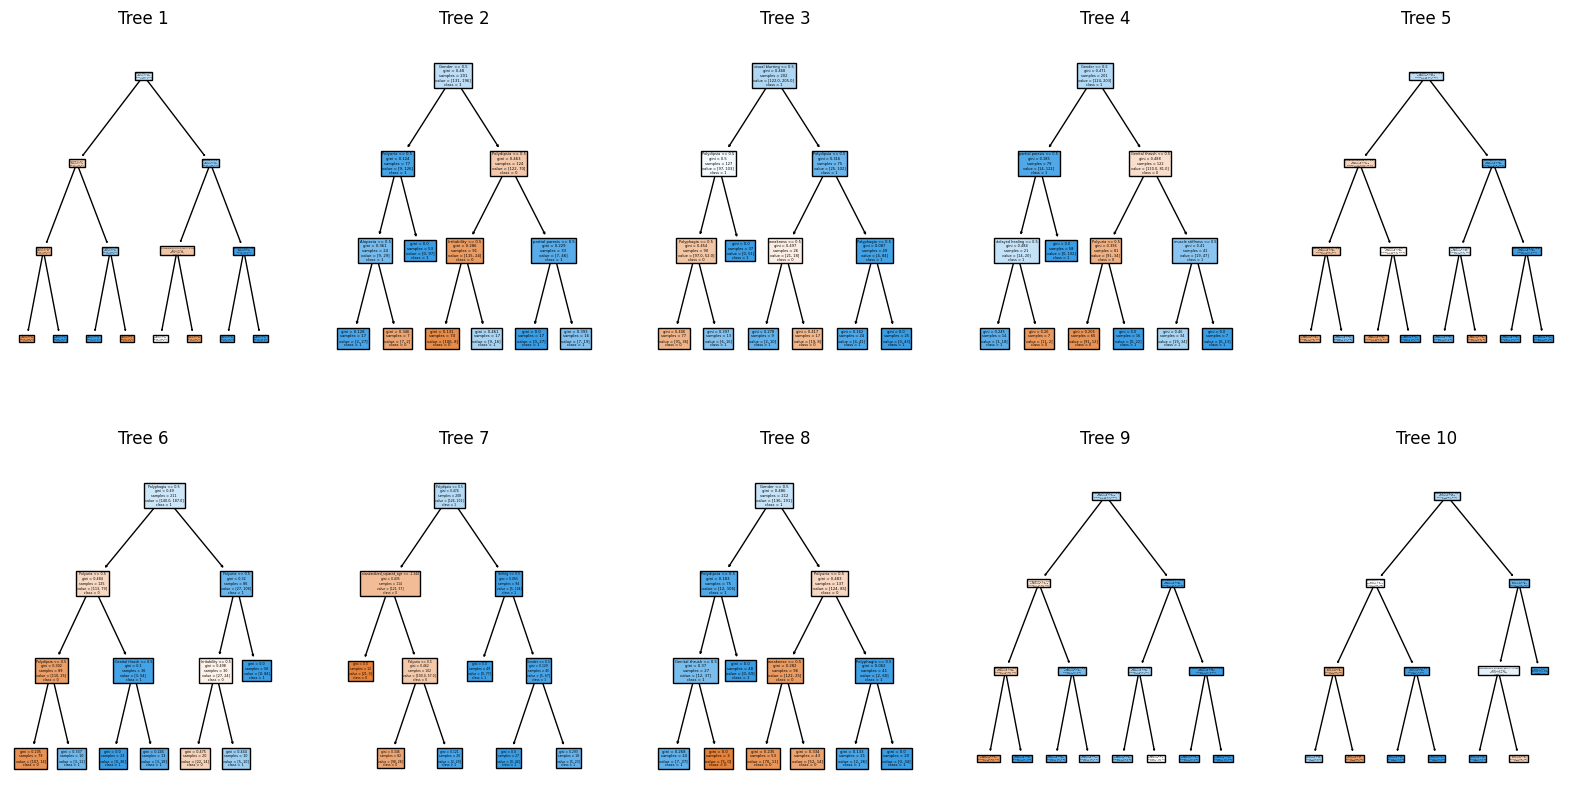

In [110]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf_3.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_3.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.5, 0.875, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.25, 0.625, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.125, 0.375, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 17]\nclass = 1'),
 Text(0.375, 0.375, 'Alopecia <= 0.5\ngini = 0.43\nsamples = 21\nvalue = [10, 22]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.087\nsamples = 14\nvalue = [1, 21]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.18\nsamples = 7\nvalue = [9, 1]\nclass = 0'),
 Text(0.75, 0.625, 'Polyuria <= 0.5\ngini = 0.417\nsamples = 131\nvalue = [59, 140]\nclass = 1'),
 Text(0.625, 0.375, 'standardized_squared_age <= 0.458\ngini = 0.456\nsamples = 56\nvalue = [57, 31]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 30\nvalue = [25, 24]\nclass = 0'),
 Text(0

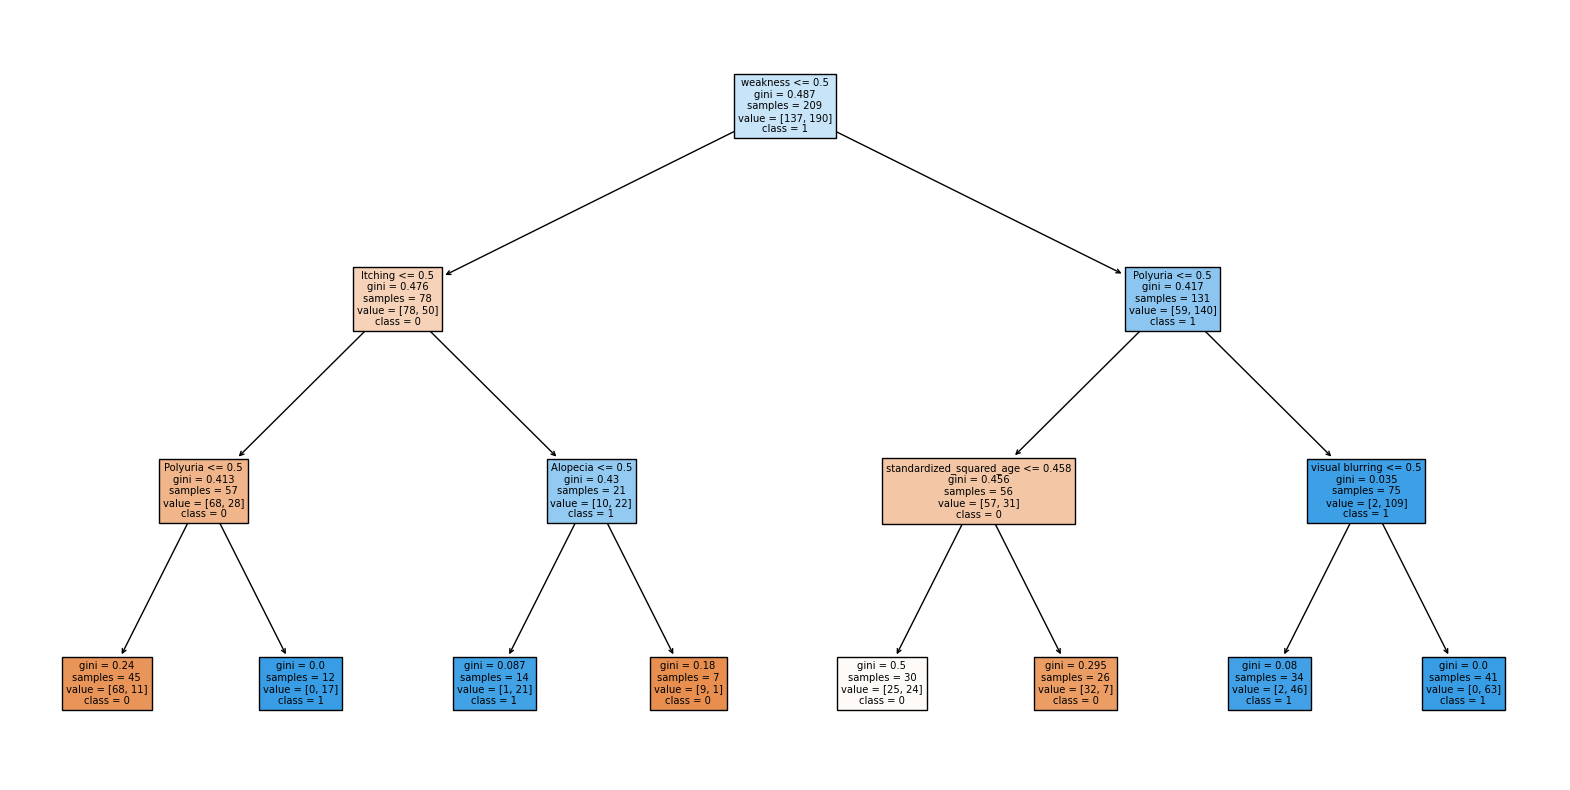

In [111]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf_3.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

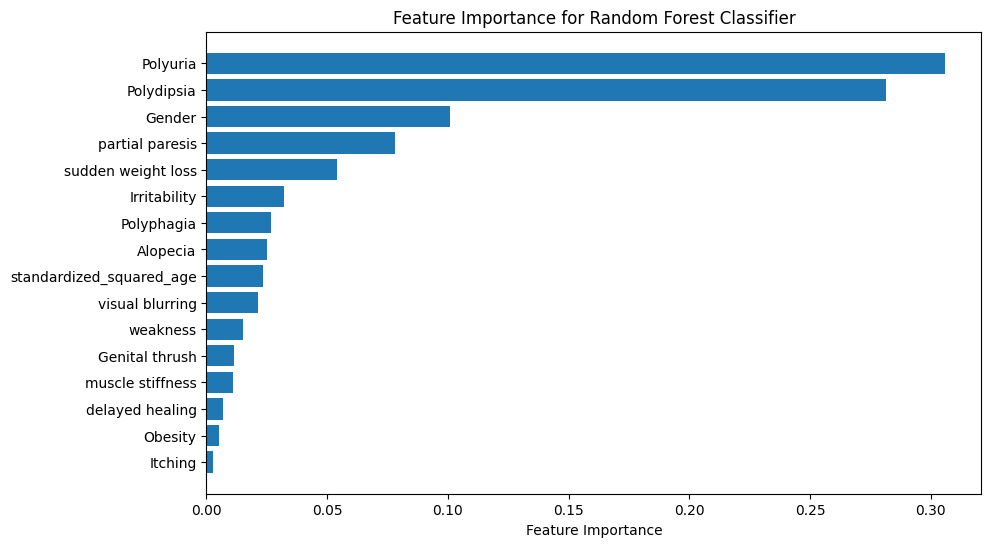

In [112]:
feature_importance = RF_clf_3.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [113]:
#Testing different estimators in random forest (unpruned)

In [114]:
#Build a random forest - 2 estimators
RF_clf_2E = RandomForestClassifier(n_estimators=2, random_state=99)
RF_clf_2E.fit(X_train, y_train)
RF_clf_2E.score(X_test, y_test)

0.9148936170212766

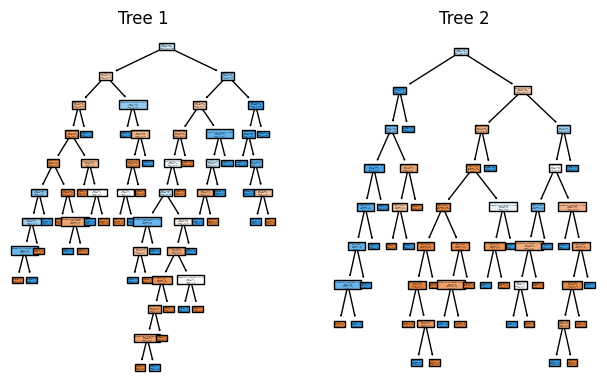

In [115]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf_2E.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_2E.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.5861486486486487, 0.9583333333333334, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.3581081081081081, 0.875, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.25675675675675674, 0.7916666666666666, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.22972972972972974, 0.7083333333333334, 'Alopecia <= 0.5\ngini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.16216216216216217, 0.625, 'Gender <= 0.5\ngini = 0.19\nsamples = 39\nvalue = [59, 7]\nclass = 0'),
 Text(0.10810810810810811, 0.5416666666666666, 'Genital thrush <= 0.5\ngini = 0.408\nsamples = 5\nvalue = [2, 5]\nclass = 1'),
 Text(0.08108108108108109, 0.4583333333333333, 'sudden weight loss <= 0.5\ngini = 0.444\nsamples = 4\nvalue = [2, 4]\nclass = 1'),
 Text(0.05405405405405406, 0.375, 'standardized_squared_age <= -1.13\ngini = 0.32\nsamples = 3\nvalue = [1, 4]\nclass = 1'),
 Text(0.02702702702702703, 0

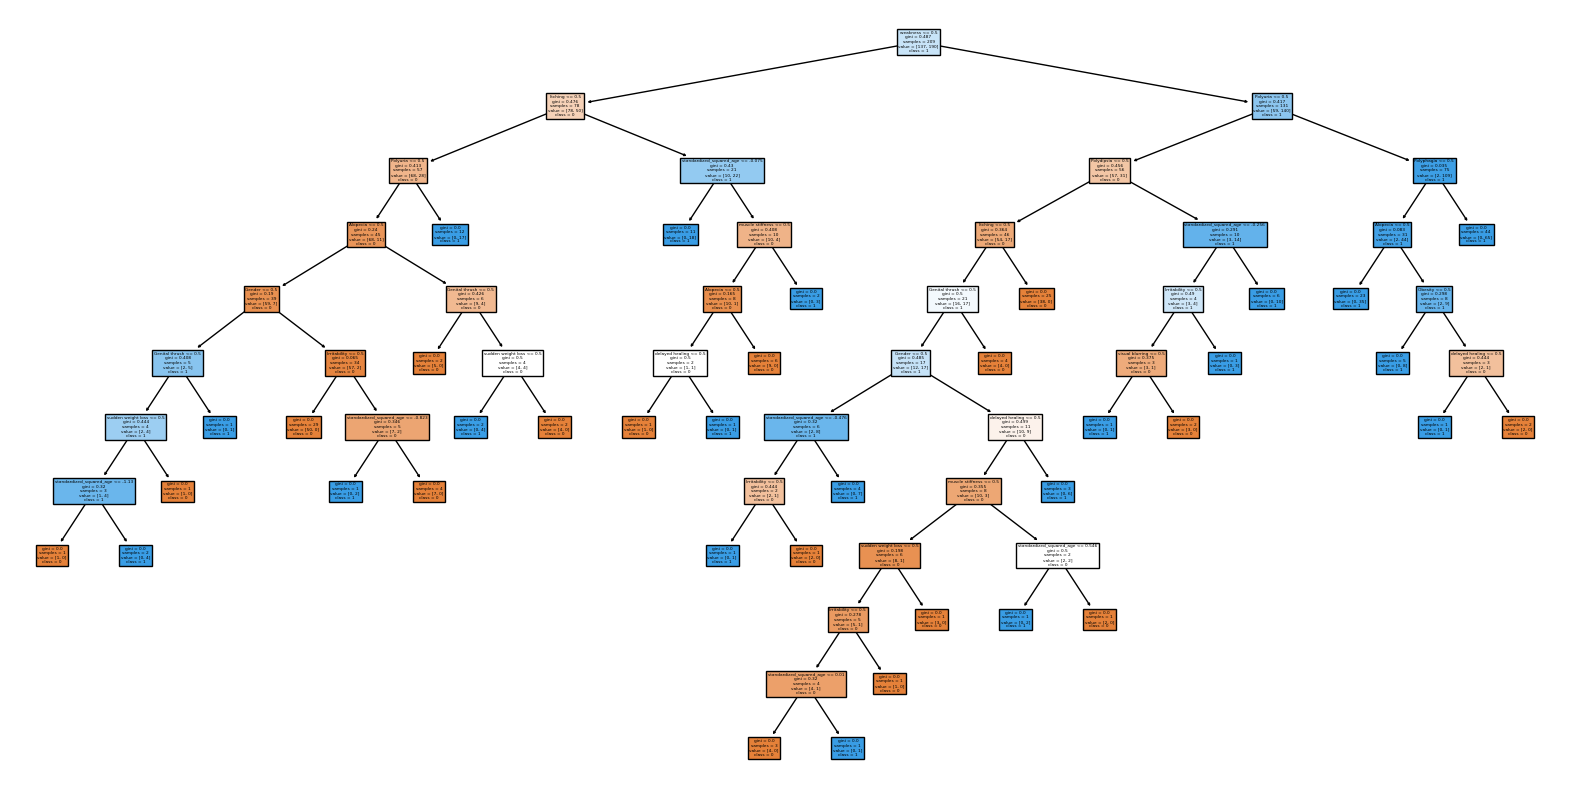

In [116]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf_2E.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

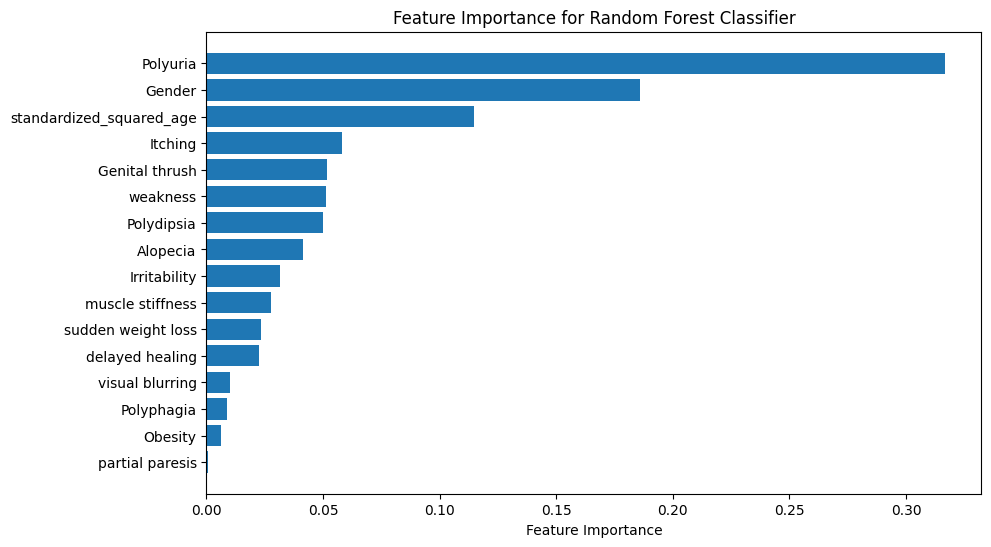

In [117]:
feature_importance = RF_clf_2E.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [118]:
#Build a random forest - 5 estimators
RF_clf_5E = RandomForestClassifier(n_estimators=5, random_state=99)
RF_clf_5E.fit(X_train, y_train)
RF_clf_5E.score(X_test, y_test)

0.9787234042553191

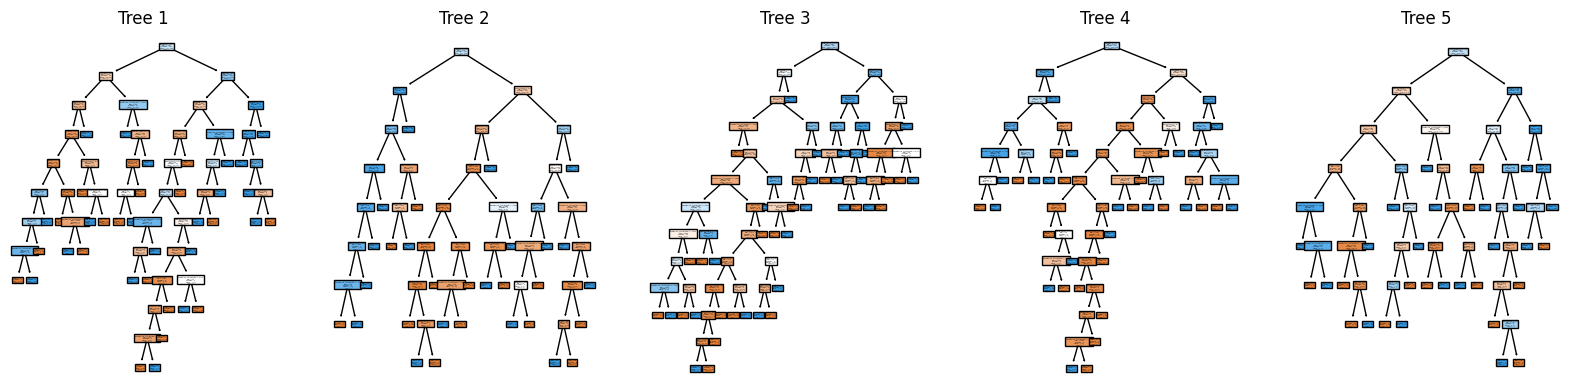

In [119]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf_5E.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_5E.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.5861486486486487, 0.9583333333333334, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.3581081081081081, 0.875, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.25675675675675674, 0.7916666666666666, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.22972972972972974, 0.7083333333333334, 'Alopecia <= 0.5\ngini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.16216216216216217, 0.625, 'Gender <= 0.5\ngini = 0.19\nsamples = 39\nvalue = [59, 7]\nclass = 0'),
 Text(0.10810810810810811, 0.5416666666666666, 'Genital thrush <= 0.5\ngini = 0.408\nsamples = 5\nvalue = [2, 5]\nclass = 1'),
 Text(0.08108108108108109, 0.4583333333333333, 'sudden weight loss <= 0.5\ngini = 0.444\nsamples = 4\nvalue = [2, 4]\nclass = 1'),
 Text(0.05405405405405406, 0.375, 'standardized_squared_age <= -1.13\ngini = 0.32\nsamples = 3\nvalue = [1, 4]\nclass = 1'),
 Text(0.02702702702702703, 0

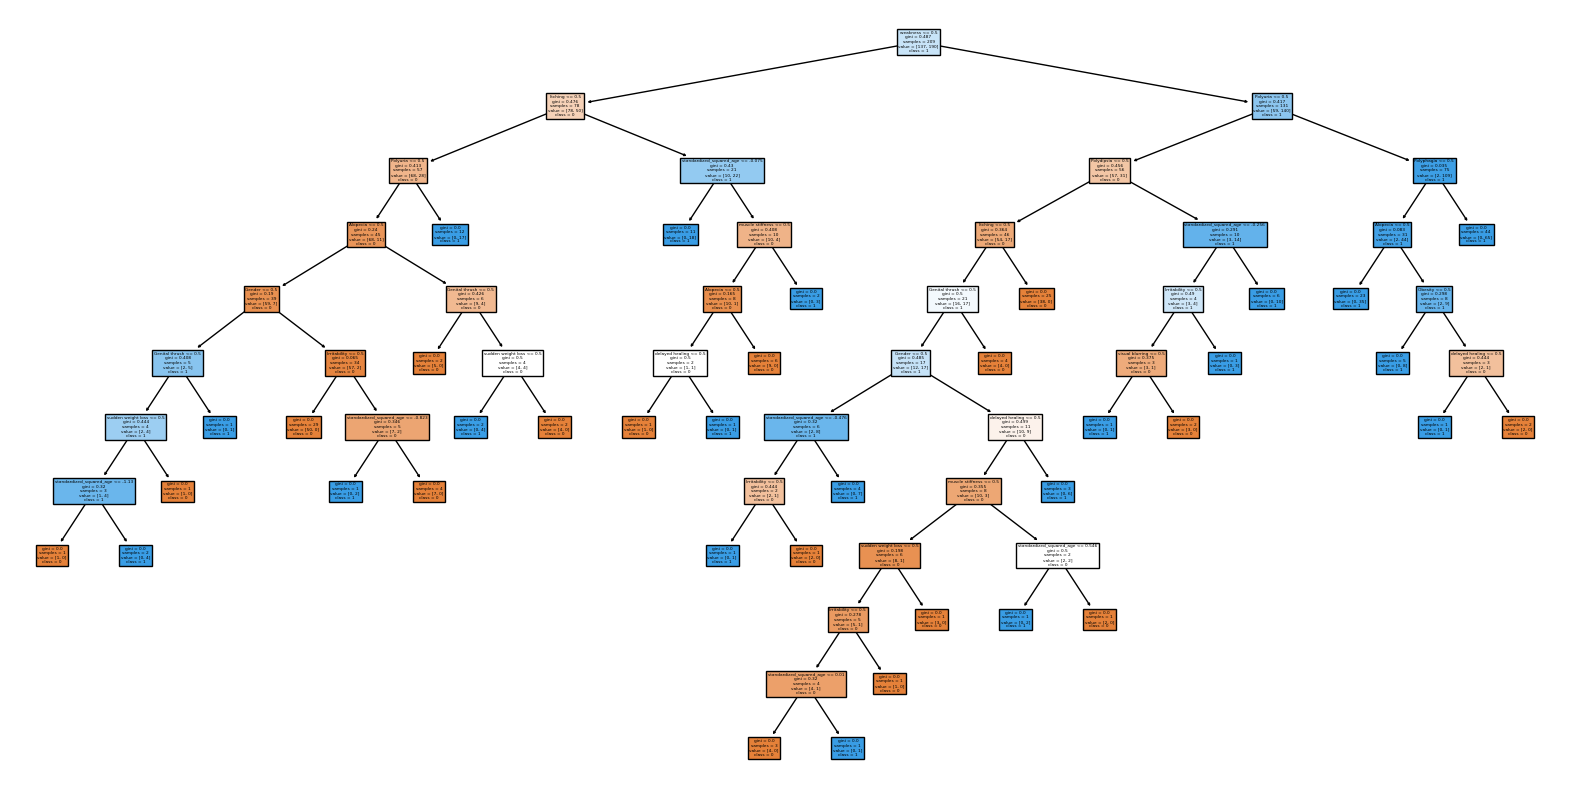

In [120]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf_5E.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

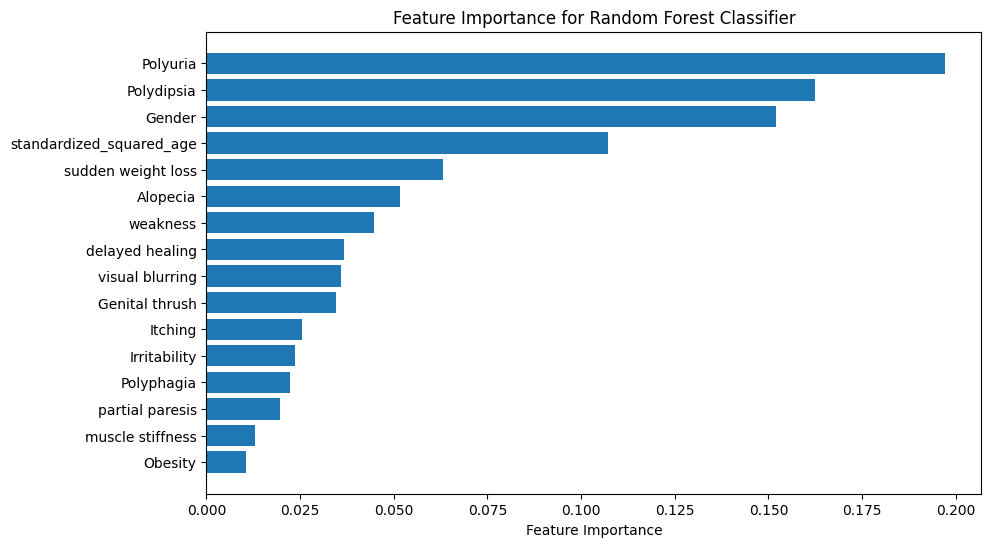

In [121]:
feature_importance = RF_clf_5E.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [122]:
#Build a random forest - 10 estimators
RF_clf_10E = RandomForestClassifier(n_estimators=10, random_state=99)
RF_clf_10E.fit(X_train, y_train)
RF_clf_10E.score(X_test, y_test)

0.9787234042553191

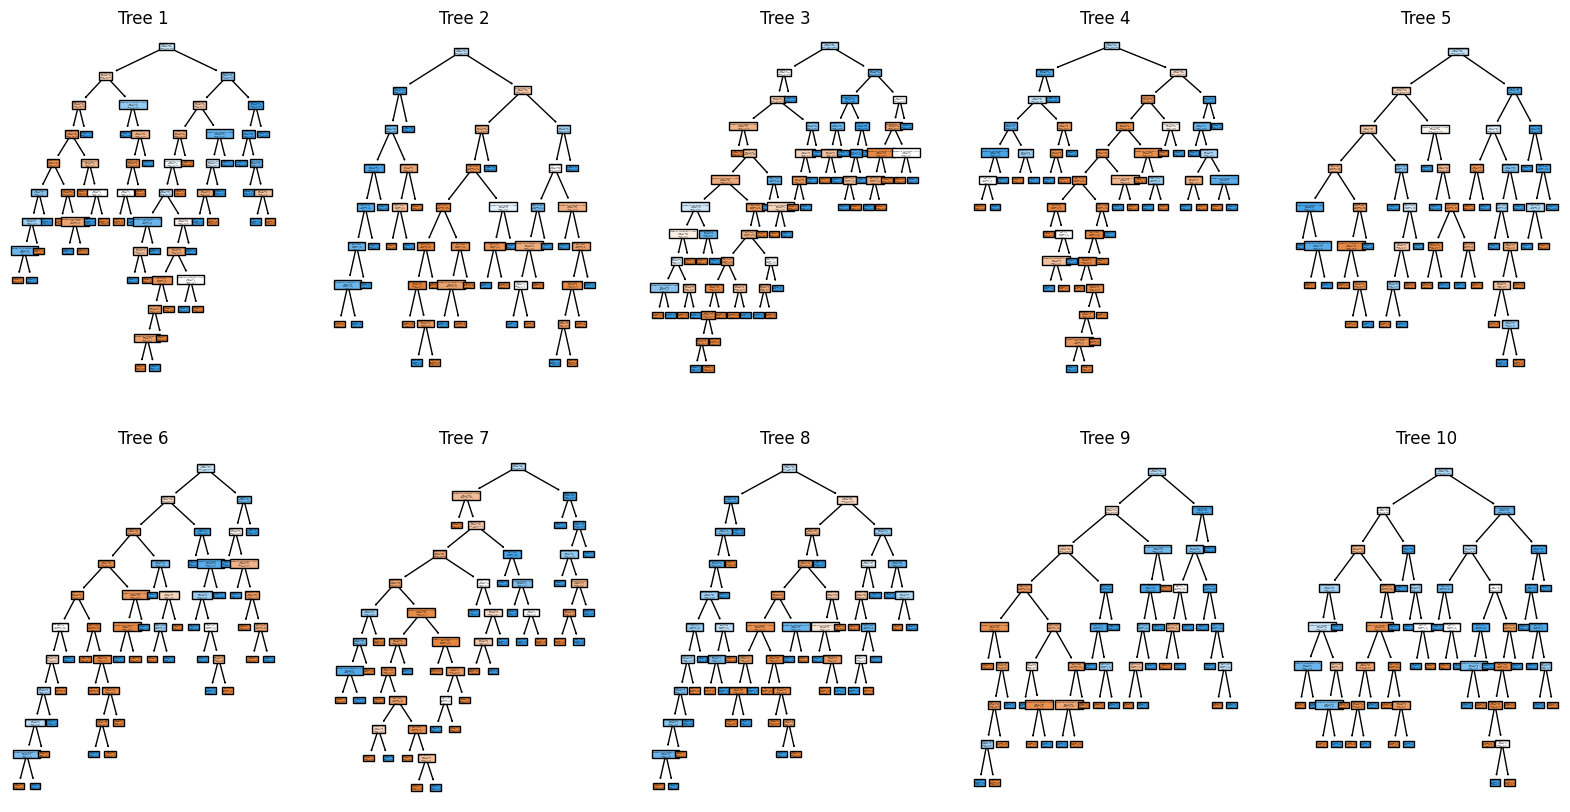

In [123]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf_10E.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_10E.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.5861486486486487, 0.9583333333333334, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.3581081081081081, 0.875, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.25675675675675674, 0.7916666666666666, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.22972972972972974, 0.7083333333333334, 'Alopecia <= 0.5\ngini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.16216216216216217, 0.625, 'Gender <= 0.5\ngini = 0.19\nsamples = 39\nvalue = [59, 7]\nclass = 0'),
 Text(0.10810810810810811, 0.5416666666666666, 'Genital thrush <= 0.5\ngini = 0.408\nsamples = 5\nvalue = [2, 5]\nclass = 1'),
 Text(0.08108108108108109, 0.4583333333333333, 'sudden weight loss <= 0.5\ngini = 0.444\nsamples = 4\nvalue = [2, 4]\nclass = 1'),
 Text(0.05405405405405406, 0.375, 'standardized_squared_age <= -1.13\ngini = 0.32\nsamples = 3\nvalue = [1, 4]\nclass = 1'),
 Text(0.02702702702702703, 0

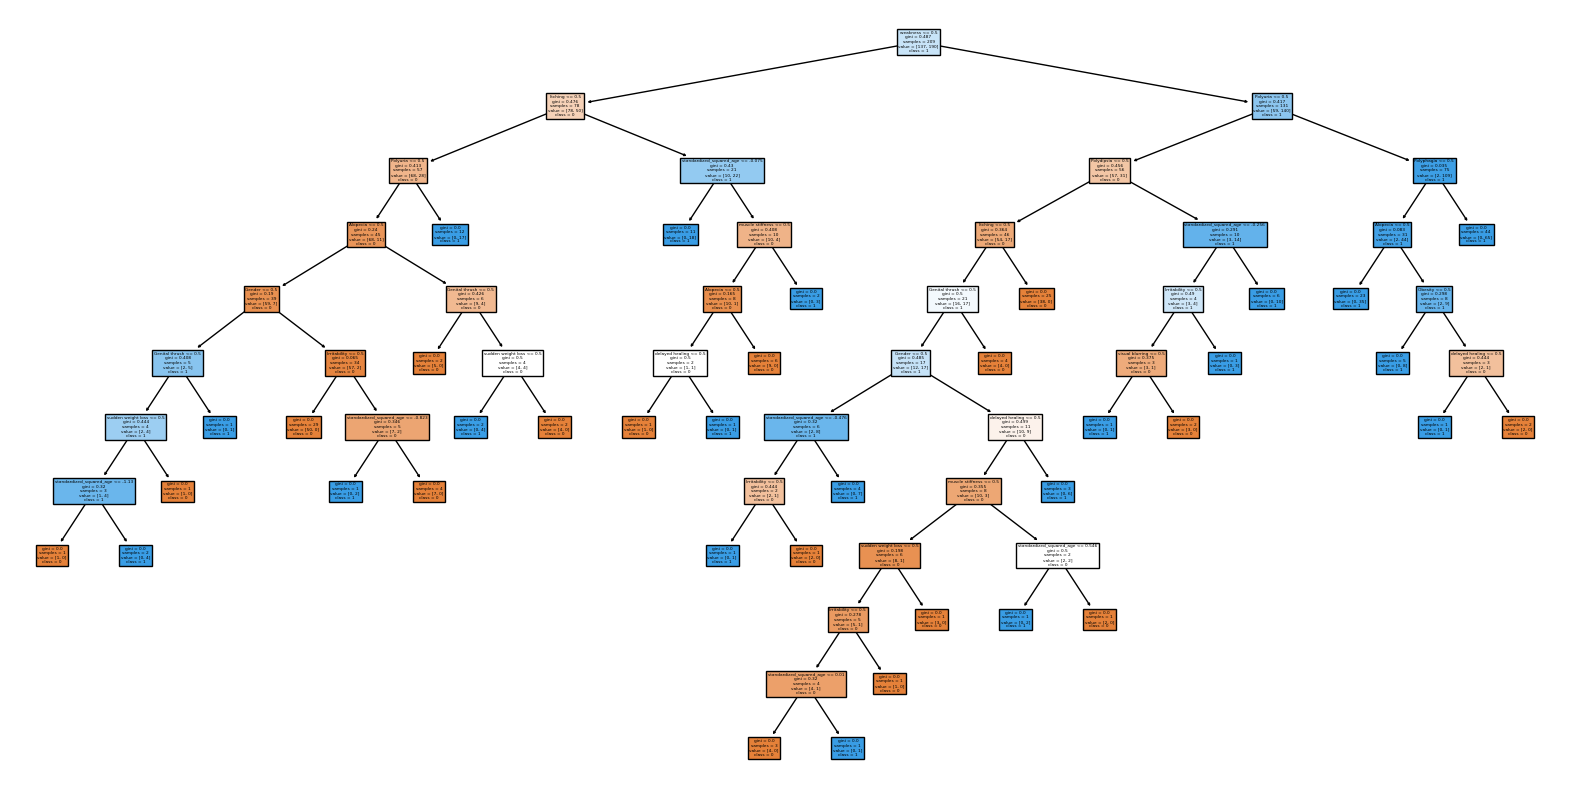

In [124]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf_10E.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

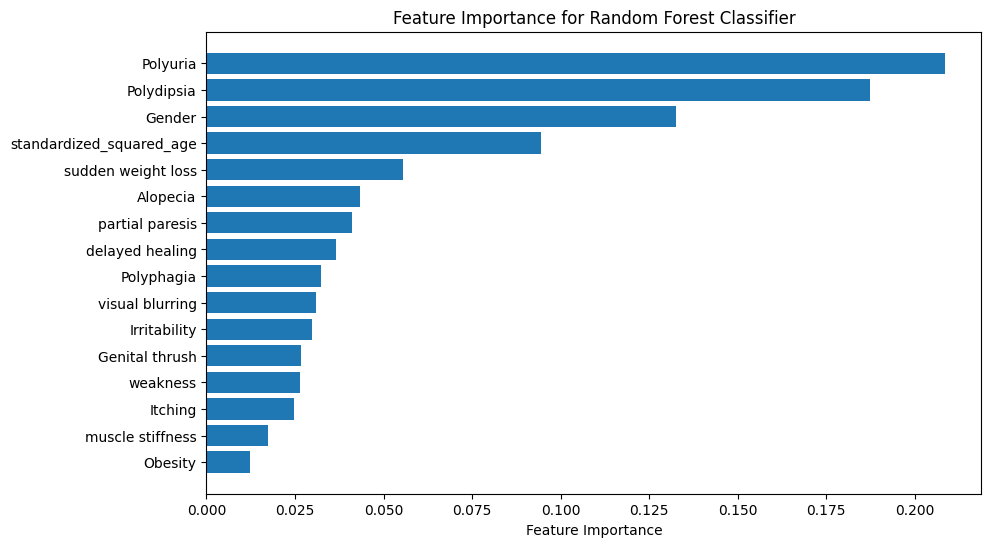

In [125]:
feature_importance = RF_clf_10E.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [126]:
#Build a random forest - 25 estimators
RF_clf_25E = RandomForestClassifier(n_estimators=25, random_state=99)
RF_clf_25E.fit(X_train, y_train)
RF_clf_25E.score(X_test, y_test)

0.9787234042553191

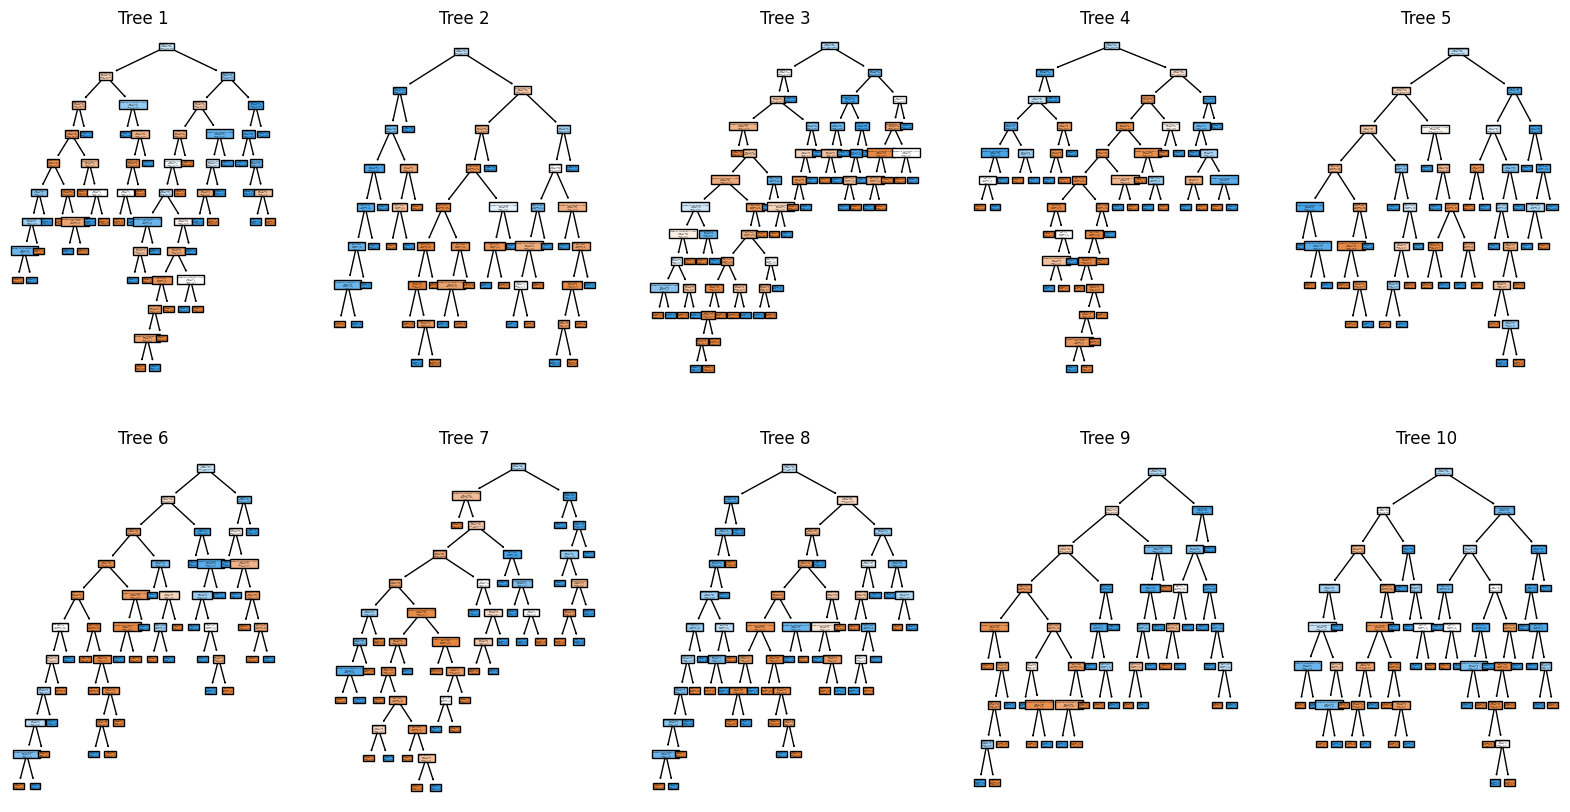

In [127]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf_25E.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_25E.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.5861486486486487, 0.9583333333333334, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.3581081081081081, 0.875, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.25675675675675674, 0.7916666666666666, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.22972972972972974, 0.7083333333333334, 'Alopecia <= 0.5\ngini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.16216216216216217, 0.625, 'Gender <= 0.5\ngini = 0.19\nsamples = 39\nvalue = [59, 7]\nclass = 0'),
 Text(0.10810810810810811, 0.5416666666666666, 'Genital thrush <= 0.5\ngini = 0.408\nsamples = 5\nvalue = [2, 5]\nclass = 1'),
 Text(0.08108108108108109, 0.4583333333333333, 'sudden weight loss <= 0.5\ngini = 0.444\nsamples = 4\nvalue = [2, 4]\nclass = 1'),
 Text(0.05405405405405406, 0.375, 'standardized_squared_age <= -1.13\ngini = 0.32\nsamples = 3\nvalue = [1, 4]\nclass = 1'),
 Text(0.02702702702702703, 0

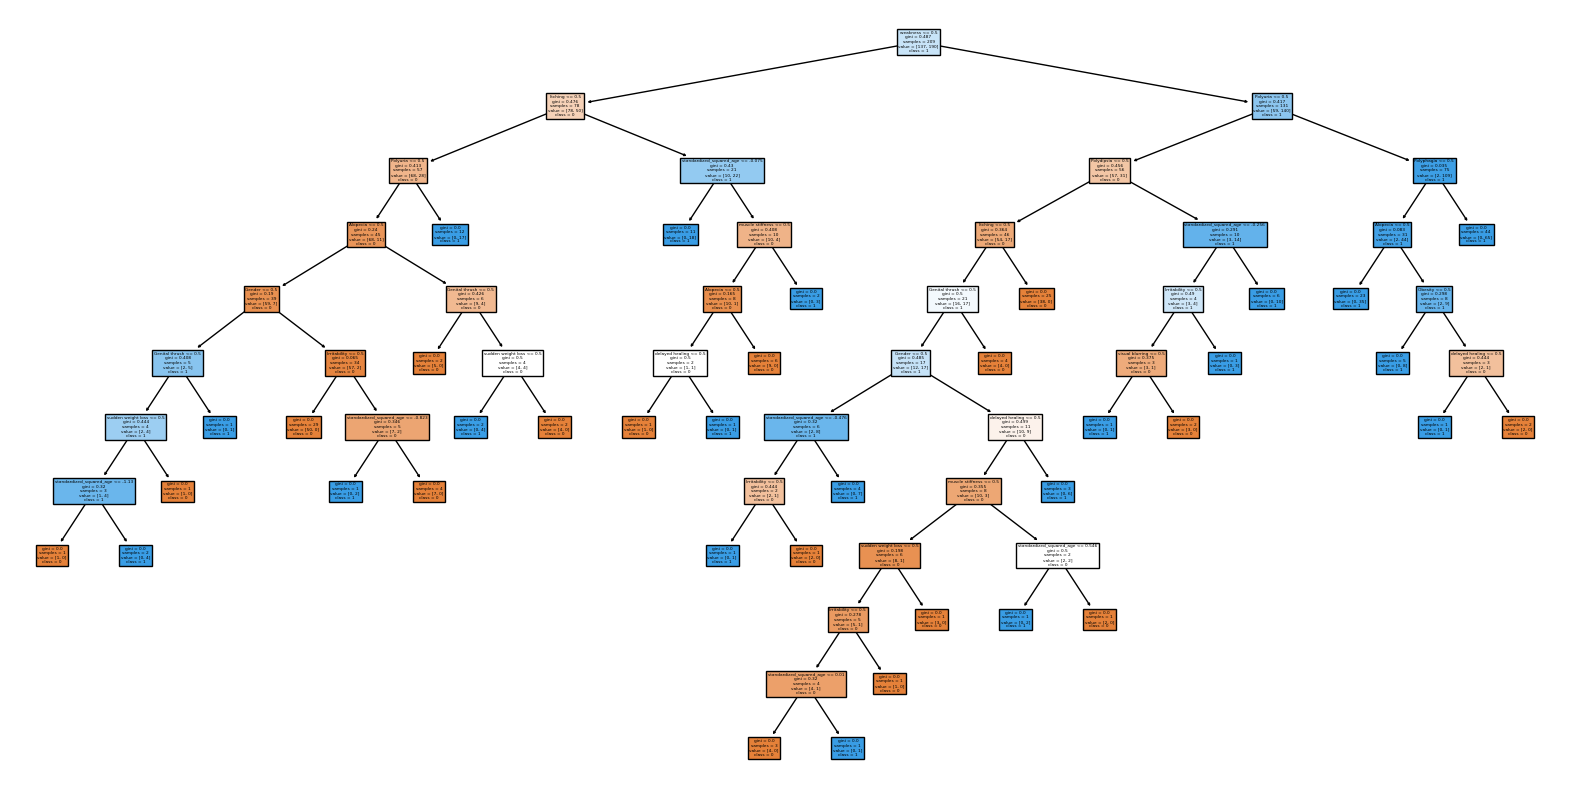

In [128]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf_25E.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

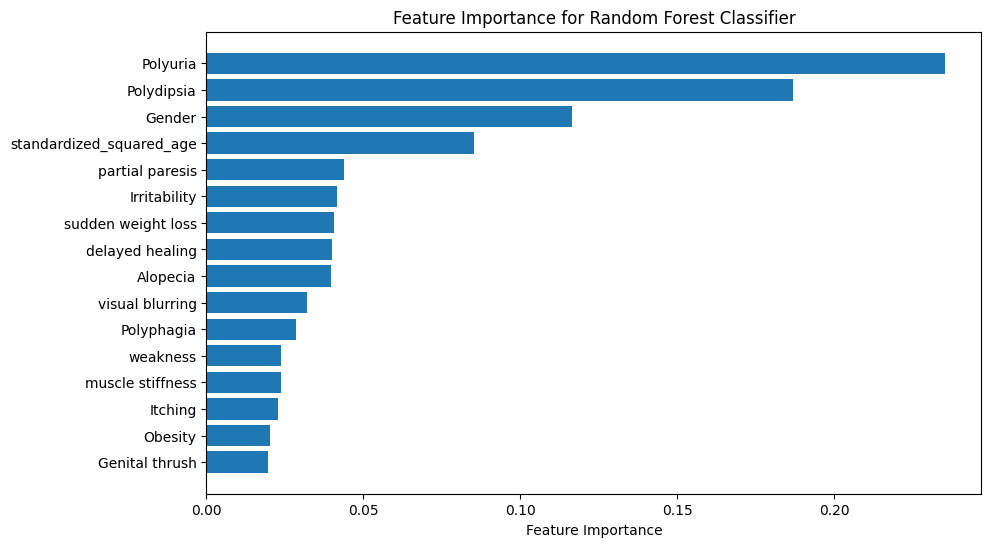

In [129]:
feature_importance = RF_clf_25E.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [130]:
#Build a random forest - 50 estimators
RF_clf_50E = RandomForestClassifier(n_estimators=50, random_state=99)
RF_clf_50E.fit(X_train, y_train)
RF_clf_50E.score(X_test, y_test)

0.9787234042553191

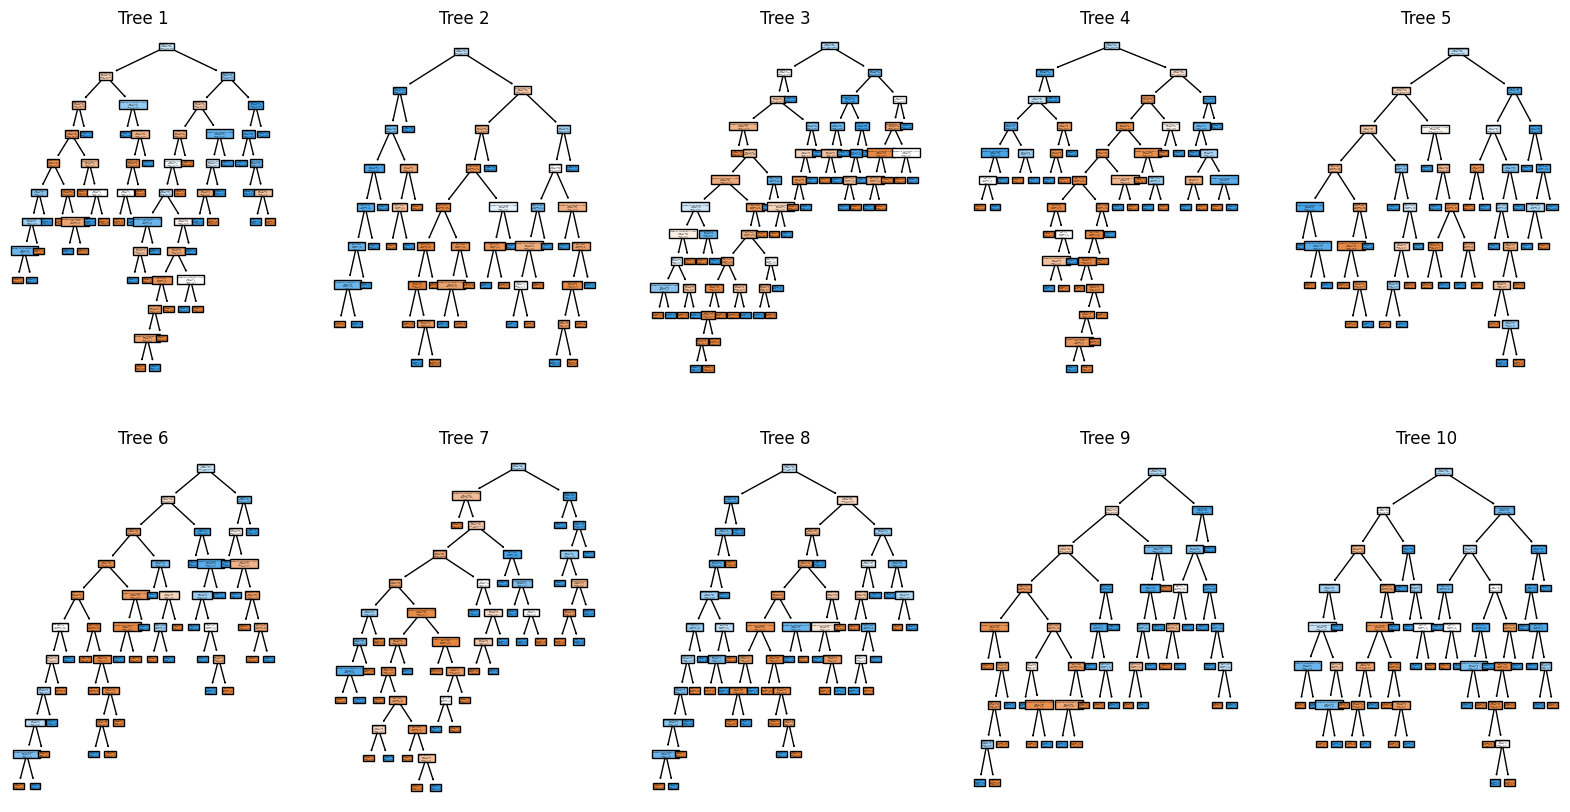

In [131]:
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf_50E.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_50E.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.5861486486486487, 0.9583333333333334, 'weakness <= 0.5\ngini = 0.487\nsamples = 209\nvalue = [137, 190]\nclass = 1'),
 Text(0.3581081081081081, 0.875, 'Itching <= 0.5\ngini = 0.476\nsamples = 78\nvalue = [78, 50]\nclass = 0'),
 Text(0.25675675675675674, 0.7916666666666666, 'Polyuria <= 0.5\ngini = 0.413\nsamples = 57\nvalue = [68, 28]\nclass = 0'),
 Text(0.22972972972972974, 0.7083333333333334, 'Alopecia <= 0.5\ngini = 0.24\nsamples = 45\nvalue = [68, 11]\nclass = 0'),
 Text(0.16216216216216217, 0.625, 'Gender <= 0.5\ngini = 0.19\nsamples = 39\nvalue = [59, 7]\nclass = 0'),
 Text(0.10810810810810811, 0.5416666666666666, 'Genital thrush <= 0.5\ngini = 0.408\nsamples = 5\nvalue = [2, 5]\nclass = 1'),
 Text(0.08108108108108109, 0.4583333333333333, 'sudden weight loss <= 0.5\ngini = 0.444\nsamples = 4\nvalue = [2, 4]\nclass = 1'),
 Text(0.05405405405405406, 0.375, 'standardized_squared_age <= -1.13\ngini = 0.32\nsamples = 3\nvalue = [1, 4]\nclass = 1'),
 Text(0.02702702702702703, 0

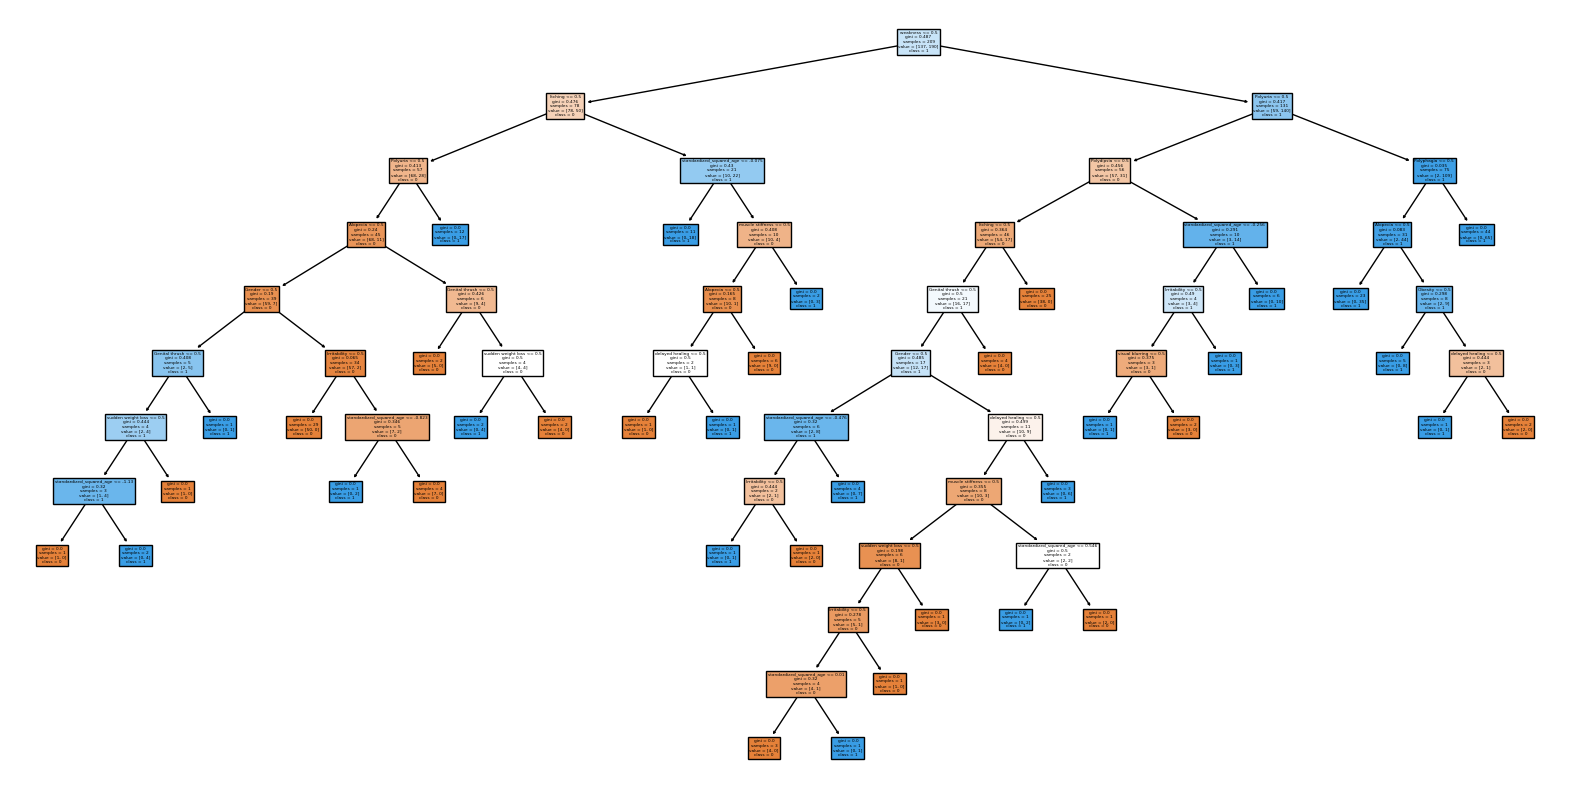

In [132]:
plt.figure(figsize=(20, 10))
plot_tree(RF_clf_50E.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

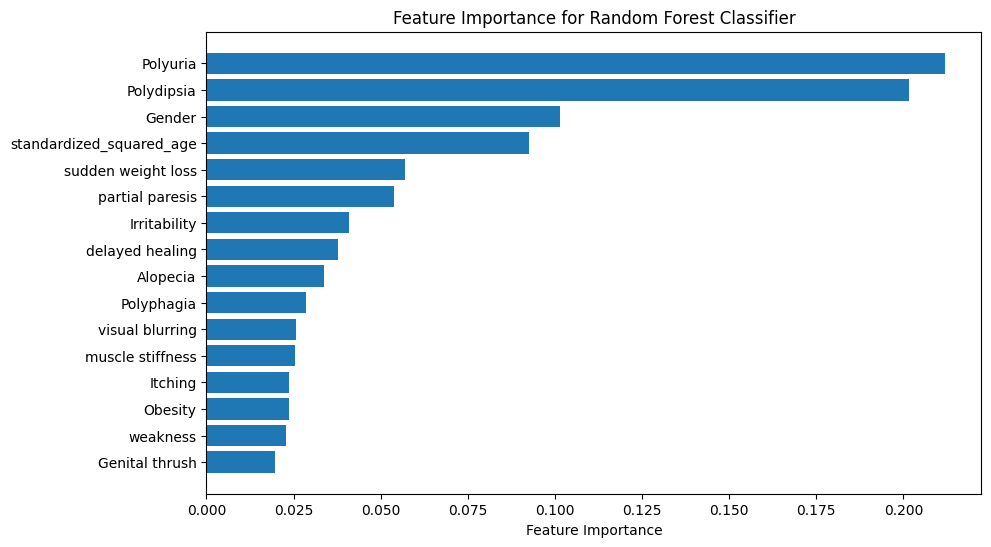

In [133]:
feature_importance = RF_clf_50E.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()